In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='AppleGothic') #한글 깨짐 방지 설정

In [2]:
df = pd.read_csv('./open/train.csv')
df.head()

ID      대출금액        대출기간       근로기간    주택소유상태       연간소득  \
0  TRAIN_00000  12480000   36 months    6 years      RENT   72000000   
1  TRAIN_00001  14400000   60 months  10+ years  MORTGAGE  130800000   
2  TRAIN_00002  12000000   36 months    5 years  MORTGAGE   96000000   
3  TRAIN_00003  14400000   36 months    8 years  MORTGAGE  132000000   
4  TRAIN_00004  18000000   60 months    Unknown      RENT   71736000   

   부채_대비_소득_비율  총계좌수   대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0        18.90    15  부채 통합             0       0       0.0    0.0    0.0    C  
1        22.33    21  주택 개선             0  373572  234060.0    0.0    0.0    B  
2         8.60    14  부채 통합             0  928644  151944.0    0.0    0.0    A  
3        15.09    15  부채 통합             0  325824  153108.0    0.0    0.0    C  
4        25.39    19  주요 구매             0  228540  148956.0    0.0    0.0    B

In [3]:
# 우선 데이터가 어떤지 탐색!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [5]:
# null값은 없는데 'unknown'처럼 대체해야 하는 값이 있음 

In [6]:
df.shape

(96294, 15)

In [7]:
df.describe(include='all')

ID          대출금액        대출기간       근로기간    주택소유상태  \
count         96294  9.629400e+04       96294      96294     96294   
unique        96294           NaN           2         16         4   
top     TRAIN_00000           NaN   36 months  10+ years  MORTGAGE   
freq              1           NaN       64479      31585     47934   
mean            NaN  1.830400e+07         NaN        NaN       NaN   
std             NaN  1.032908e+07         NaN        NaN       NaN   
min             NaN  1.200000e+06         NaN        NaN       NaN   
25%             NaN  1.020000e+07         NaN        NaN       NaN   
50%             NaN  1.680000e+07         NaN        NaN       NaN   
75%             NaN  2.400000e+07         NaN        NaN       NaN   
max             NaN  4.200000e+07         NaN        NaN       NaN   

                연간소득   부채_대비_소득_비율          총계좌수   대출목적  최근_2년간_연체_횟수  \
count   9.629400e+04  96294.000000  96294.000000  96294  96294.000000   
unique           NaN           NaN           NaN     12           NaN   
top              NaN           NaN           NaN  부채 통합           NaN   
freq             NaN           NaN           NaN  55150           NaN   
mean    9.392672e+07     19.379590     25.304827    NaN      0.345681   
std     9.956871e+07     33.569559     12.088566    NaN      0.919119   
min     0.000000e+00      0.000000      4.000000    NaN      0.000000   
25%     5.760000e+07     12.650000     17.000000    NaN      0.000000   
50%     7.800000e+07     18.740000     24.000000    NaN      0.000000   
75%     1.128000e+08     25.540000     32.000000    NaN      0.000000   
max     1.080000e+10   9999.000000    169.000000    NaN     30.000000   

               총상환원금         총상환이자         총연체금액         연체계좌수   대출등급  
count   9.629400e+04  9.629400e+04  96294.000000  96294.000000  96294  
unique           NaN           NaN           NaN           NaN      7  
top              NaN           NaN           NaN           NaN      B  
freq             NaN           NaN           NaN           NaN  28817  
mean    8.225035e+05  4.282282e+05     54.380584      0.005805    NaN  
std     1.027745e+06  4.402111e+05   1414.769218      0.079966    NaN  
min     0.000000e+00  0.000000e+00      0.000000      0.000000    NaN  
25%     3.075720e+05  1.346160e+05      0.000000      0.000000    NaN  
50%     5.976960e+05  2.870040e+05      0.000000      0.000000    NaN  
75%     1.055076e+06  5.702160e+05      0.000000      0.000000    NaN  
max     4.195594e+07  5.653416e+06  75768.000000      4.000000    NaN

In [8]:
# describe 요약, 전처리 해야 할 곳 
# 대출금액 : null, 0 값 없음
# 대출기간 : object로 되어 있지만 수치형으로 변환 가능, 36months, 60months 2개의 value로만 되어있음

# 근로기간 : object로 되어 있지만 수치형으로 변환 가능해 보임, 
# +, <를 어떻게 처리해야 할 지 통일하기, '10+ years', '10+years'/ '3 years', '3'/ '< 1 year', '<1 year' 같은 값으로 보이는데 띄어쓰기 때문에 다른 값으로 묶임
# unknow값도 있어서 어떻게 처리해야할지 통일해야 할 것으로 보임 -> 평균, 최빈값 어떤걸로 채워넣어야 하는지 고민해보기

# 주택소유상태 : unique값 4개, any는 그냥 그대로 두어야 하나?
# 연간소득 : 수치형 데이터
# 부채_대비_소득_비율 : 수치형 데이터
# 총계좌수 : 수치형 데이터
# 대출목적 : 범주형 데이터, 12ro
# 최근_2년간_연체_횟수 : 수치형 데이터
# 총상환원금 : 수치형 데이터
# 총상환이자 : 수치형 데이터
# 총연체금액 : 수치형 데이터
# 연체계좌수 : 수치형 데이터
# 대출등급 : A~G 총 7개의 등급으로 되어 있음

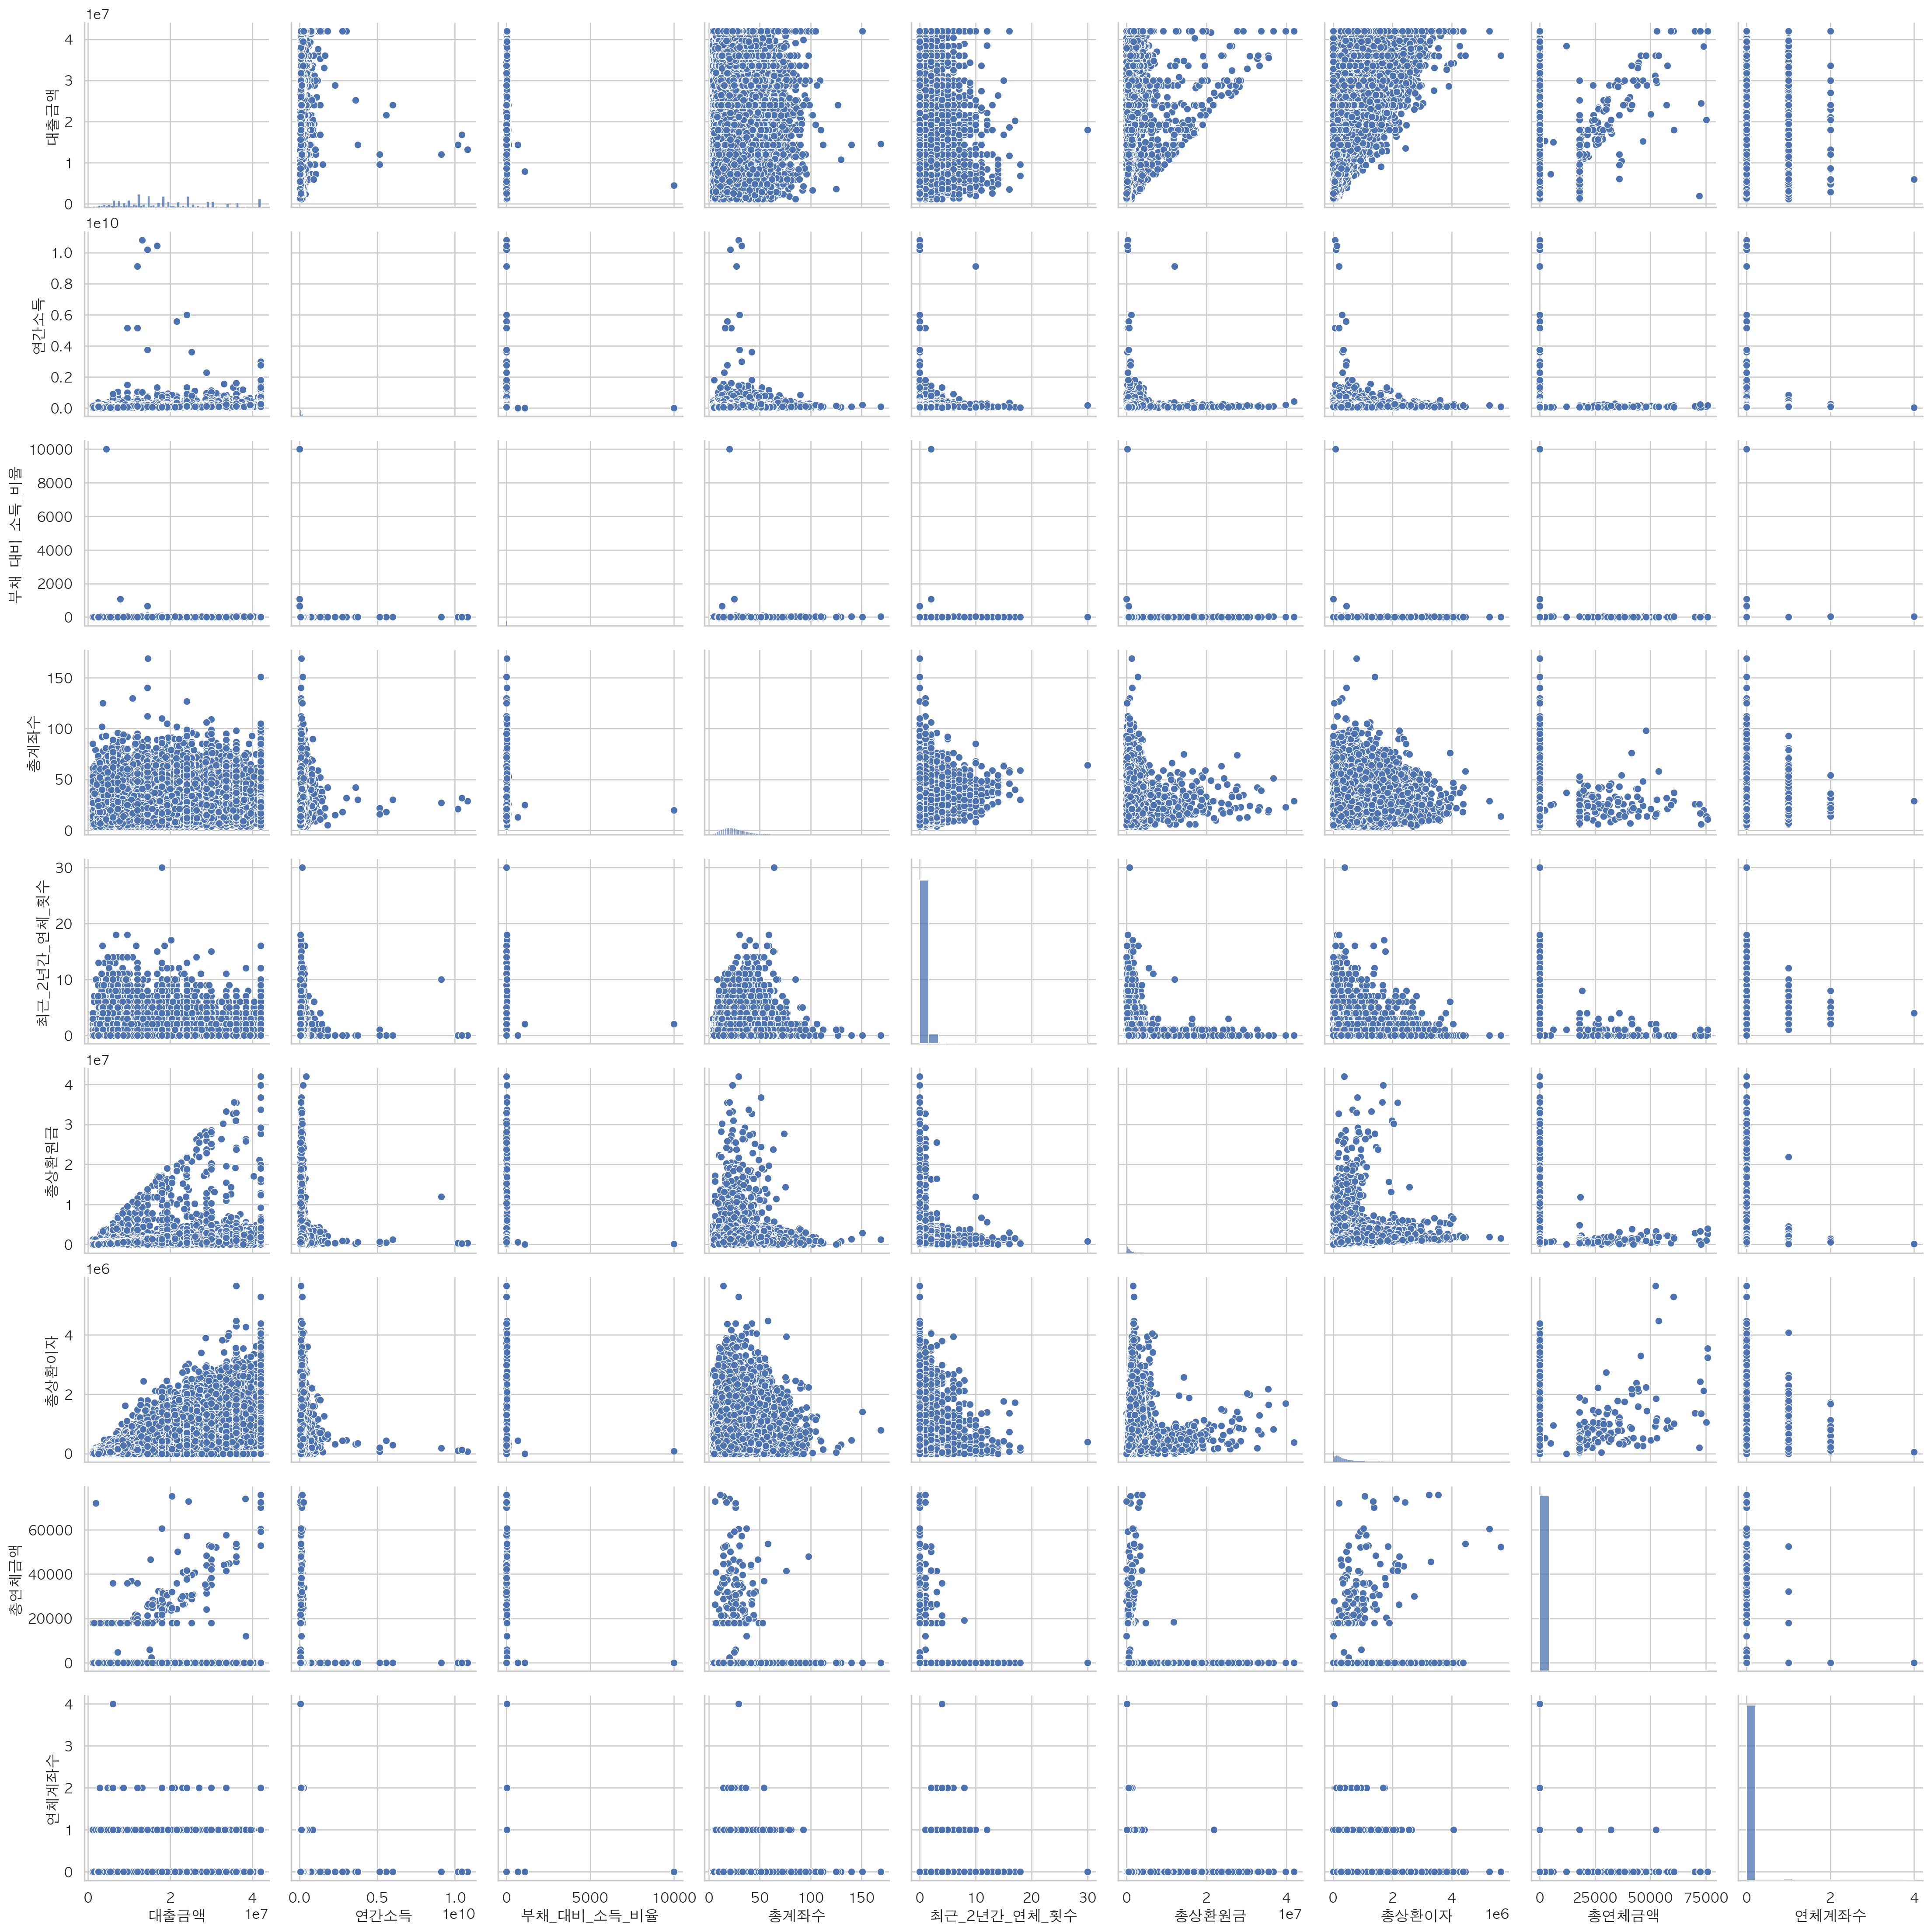

In [9]:
sns.pairplot(data=df)

In [10]:
df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

In [11]:
col_list1 = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수']

In [12]:
col_list2 = ['최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

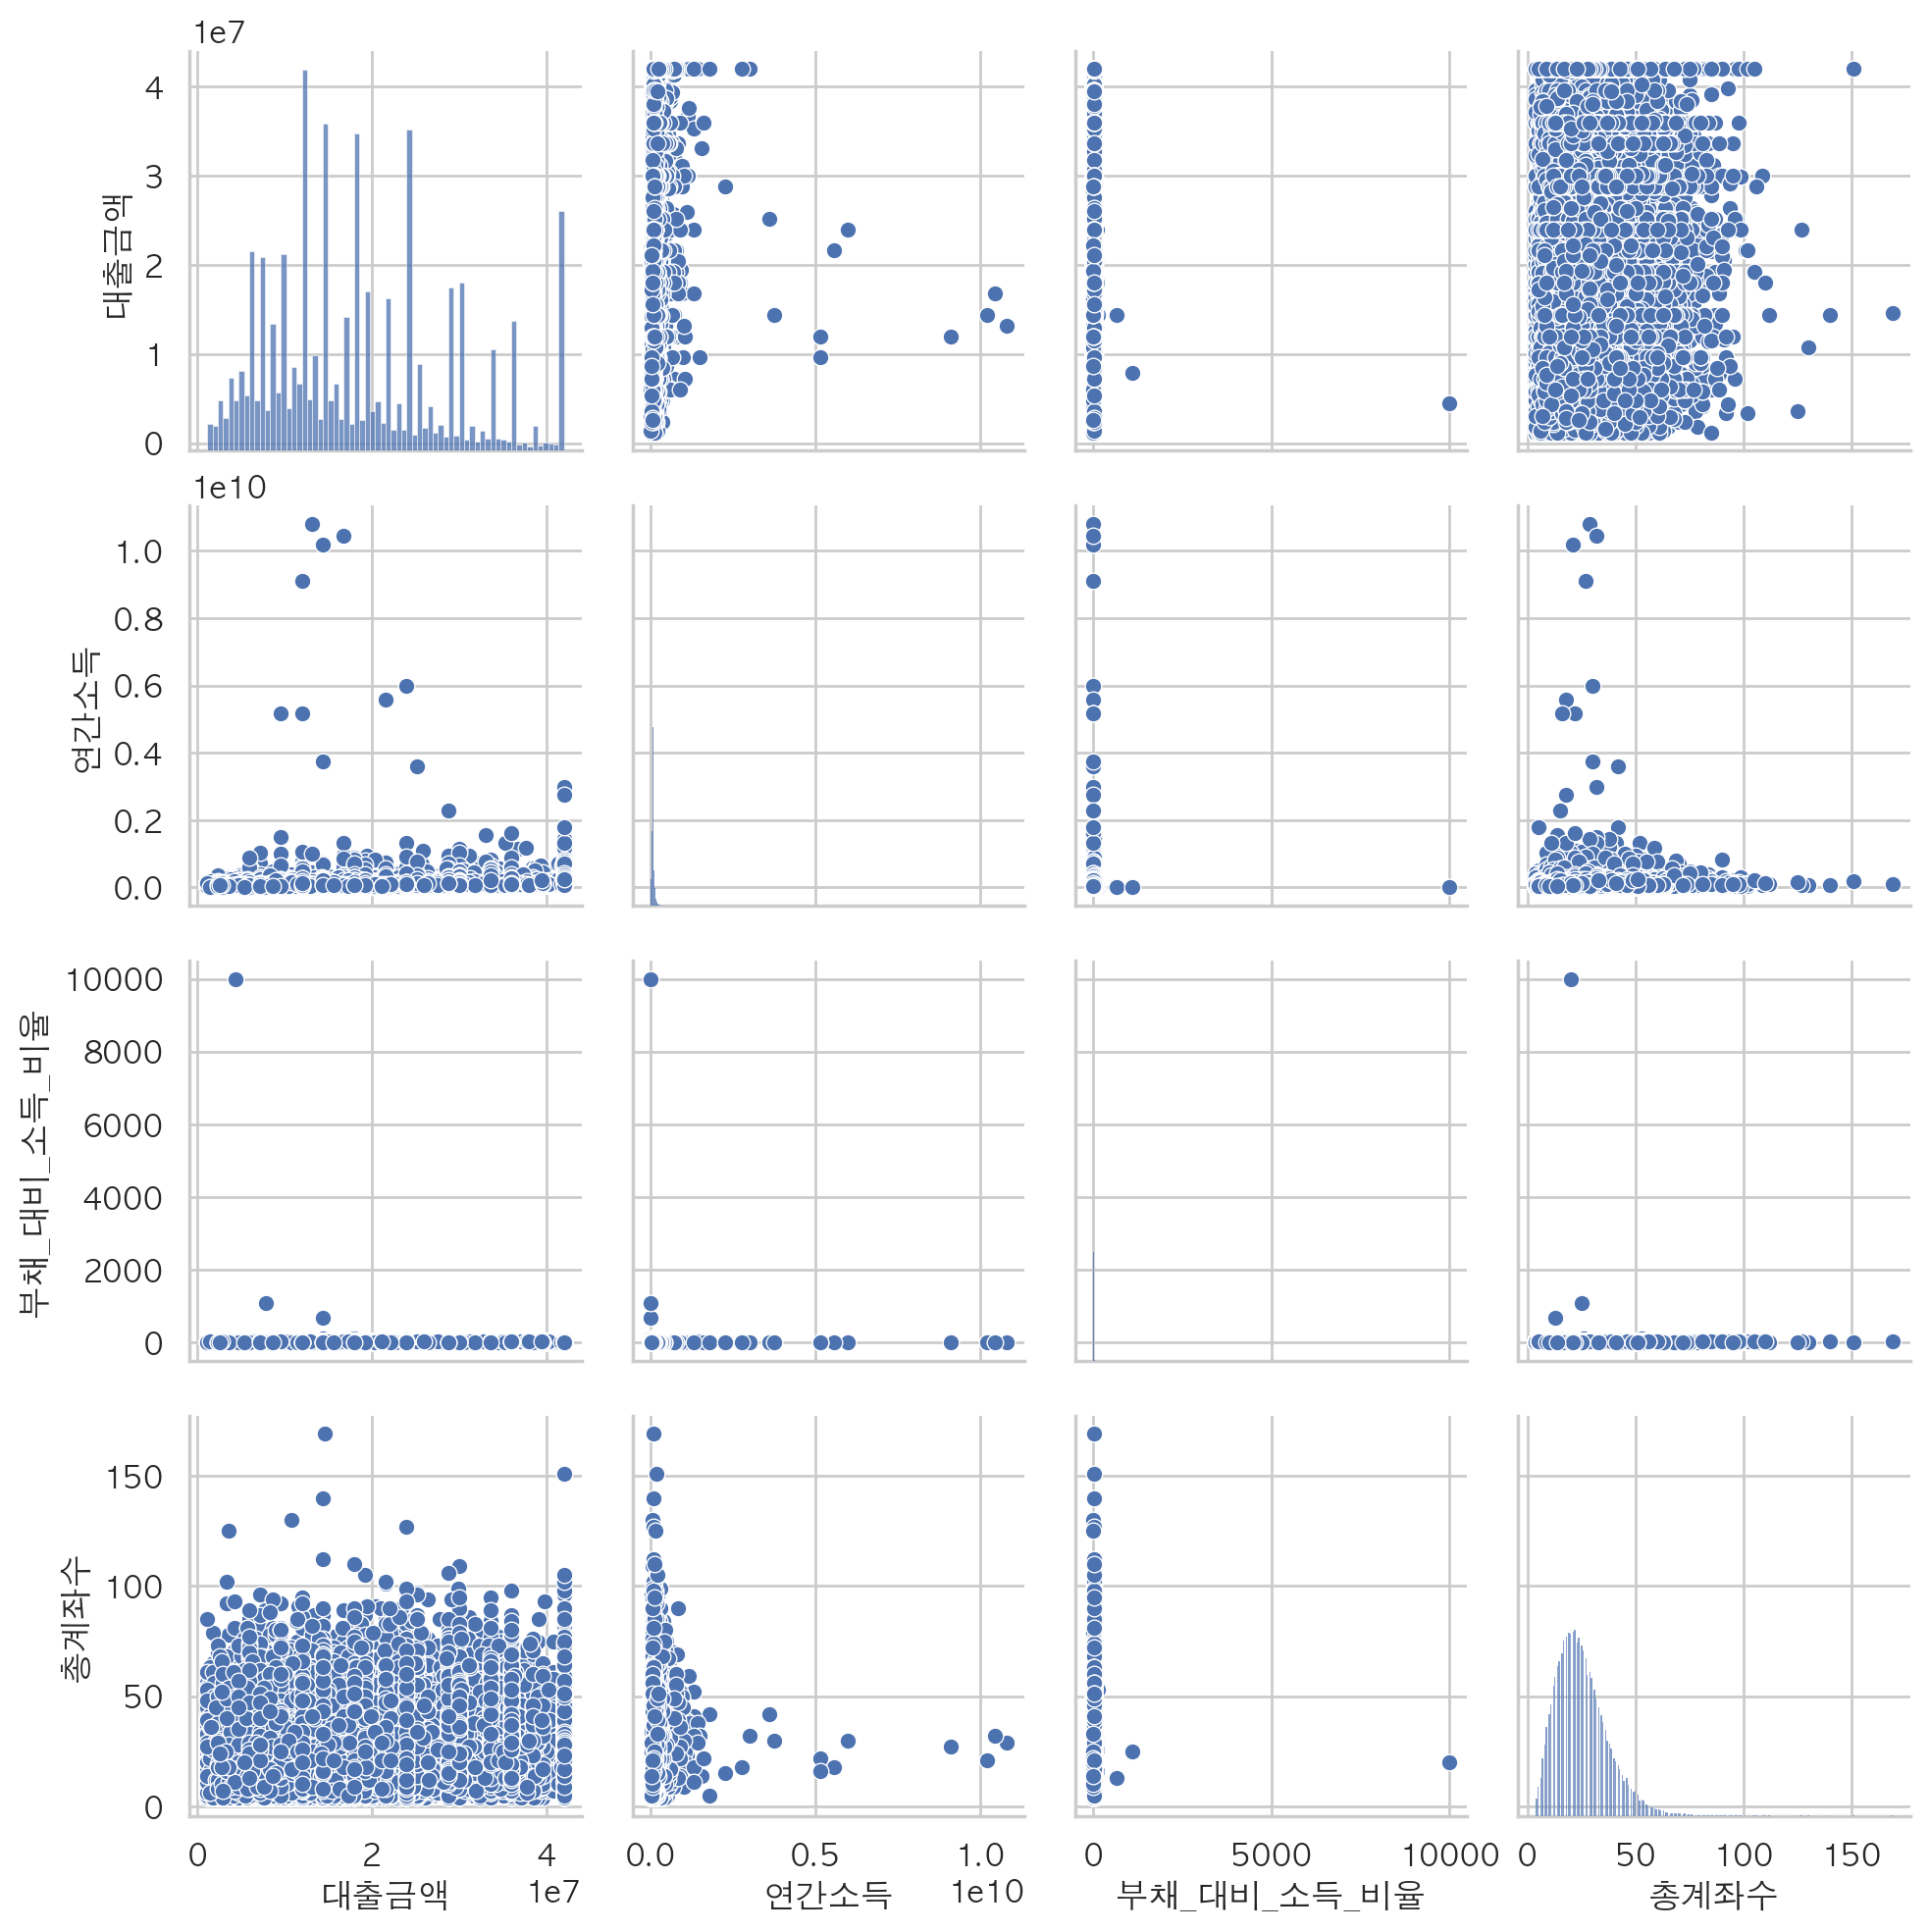

In [13]:
sns.pairplot(data=df[col_list1])

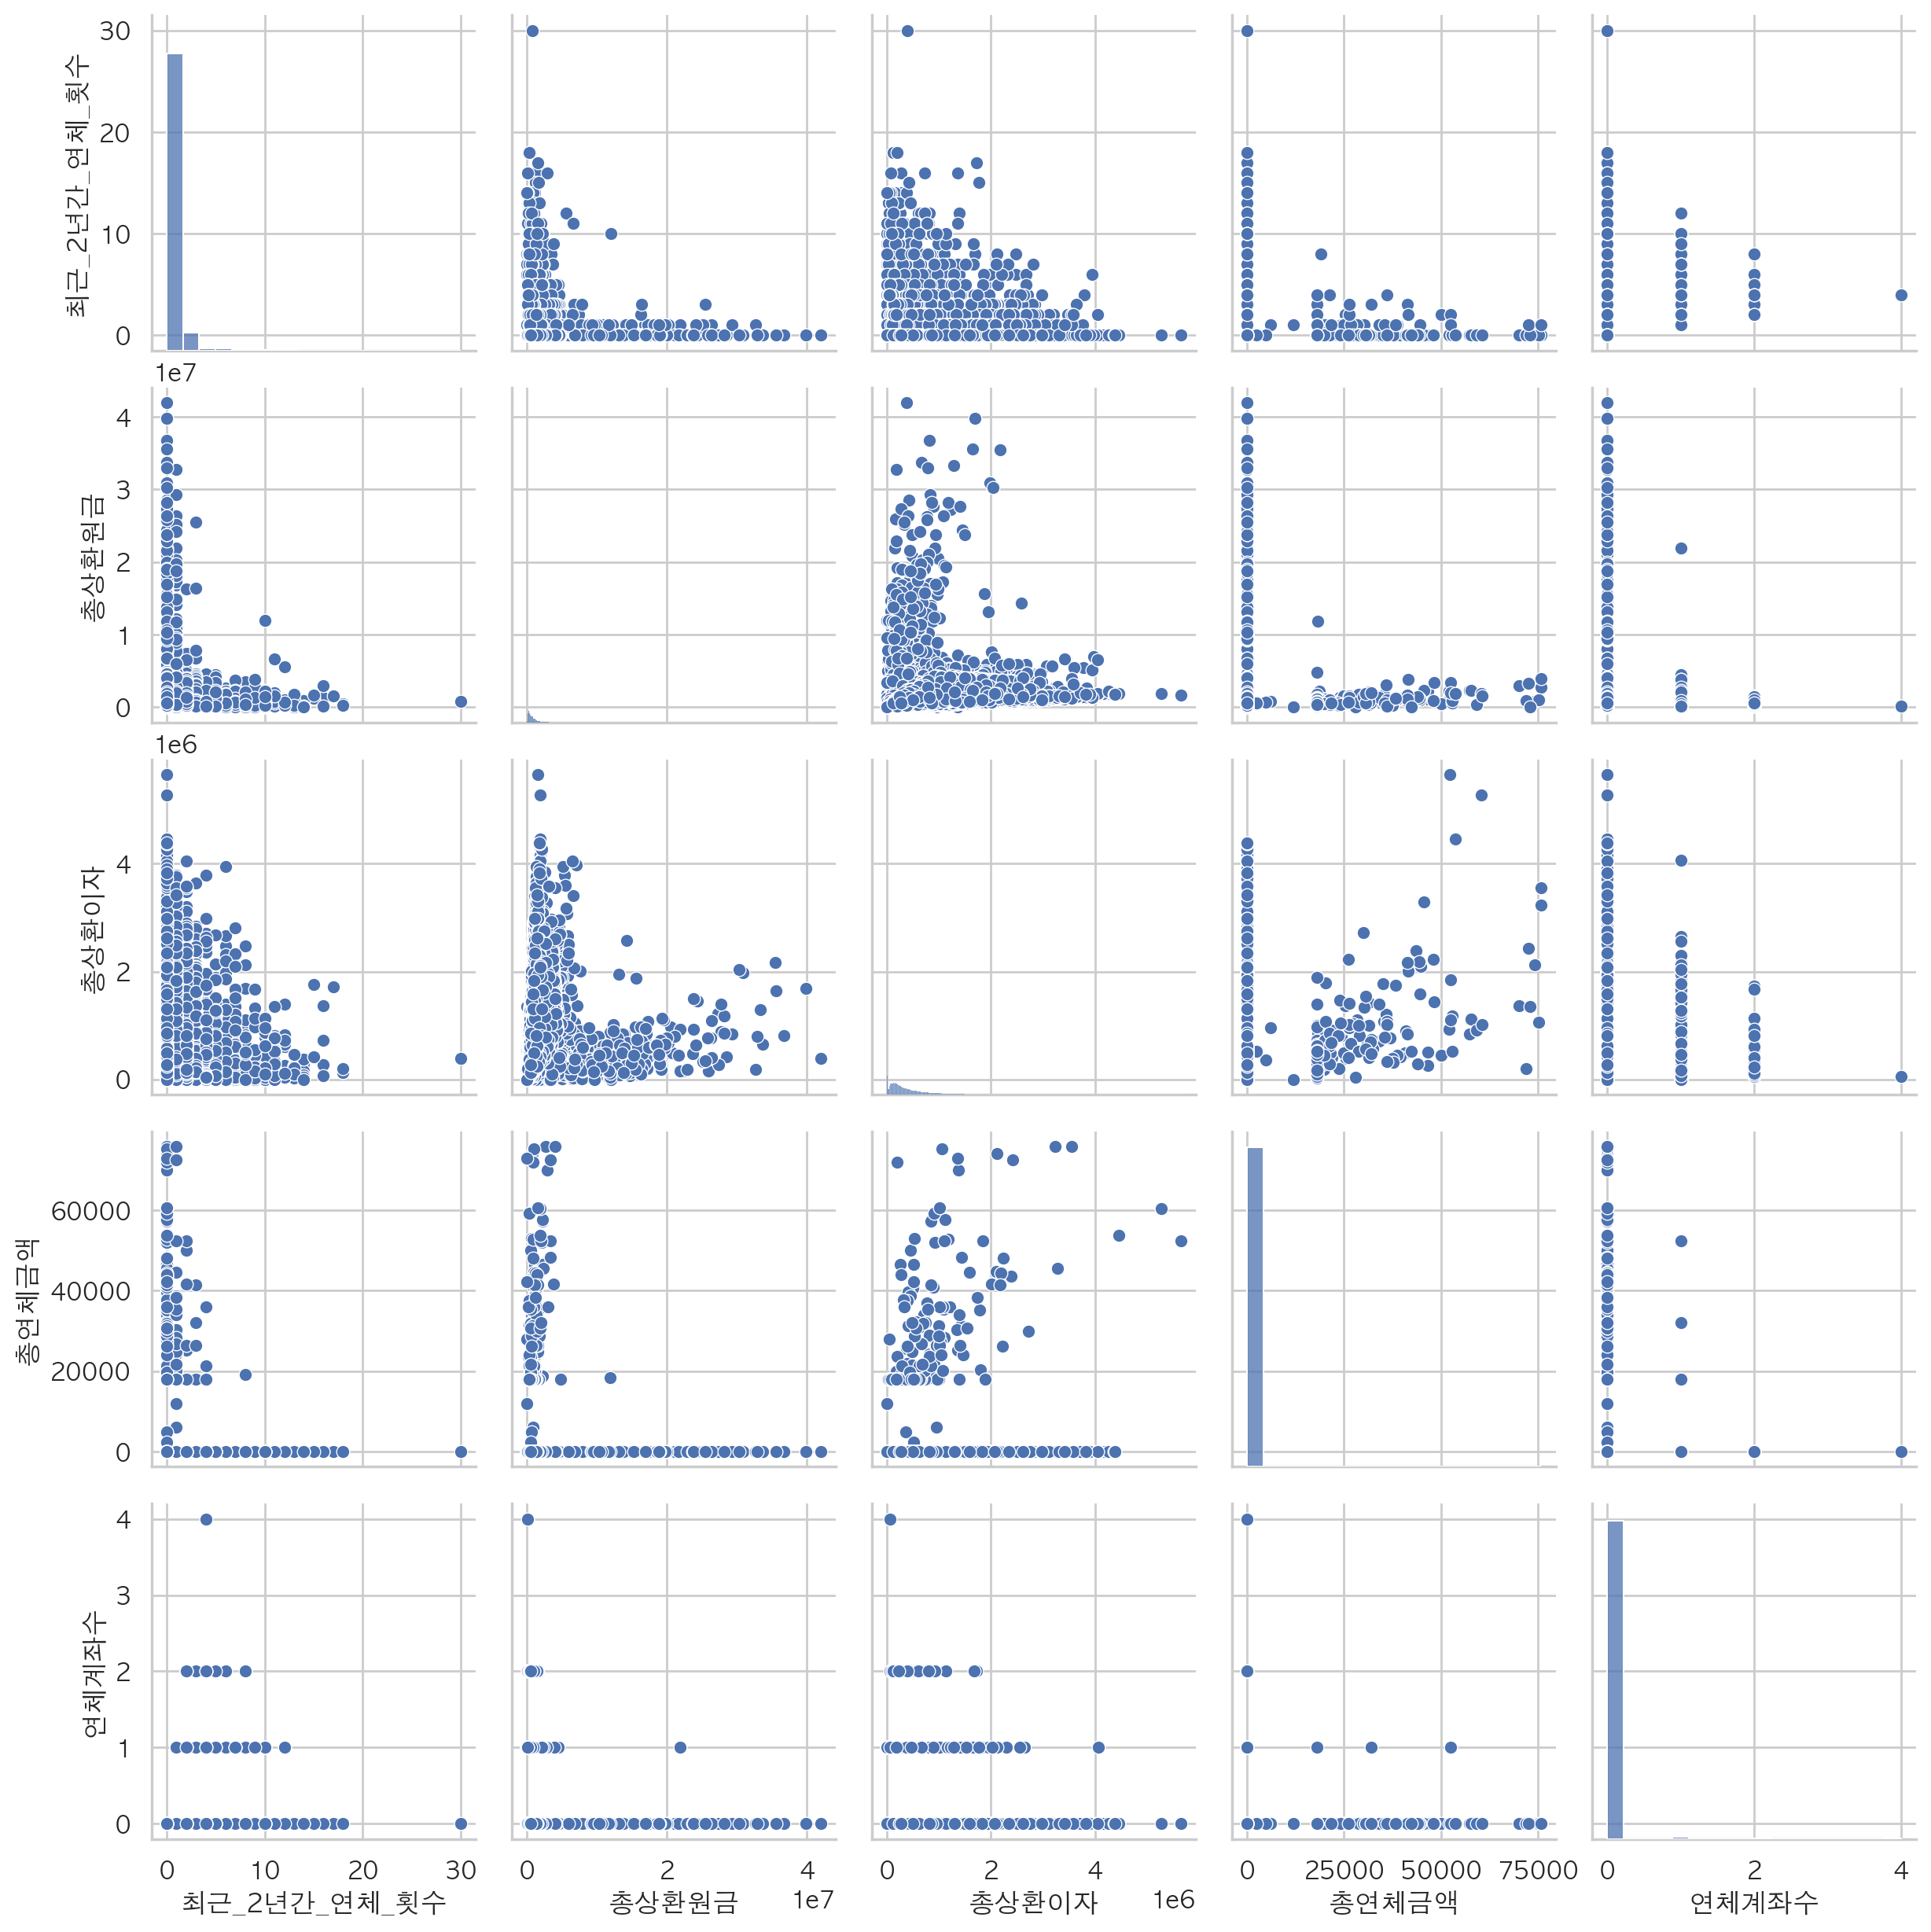

In [14]:
sns.pairplot(data=df[col_list2])

In [15]:
columns_to_plot = ['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급']

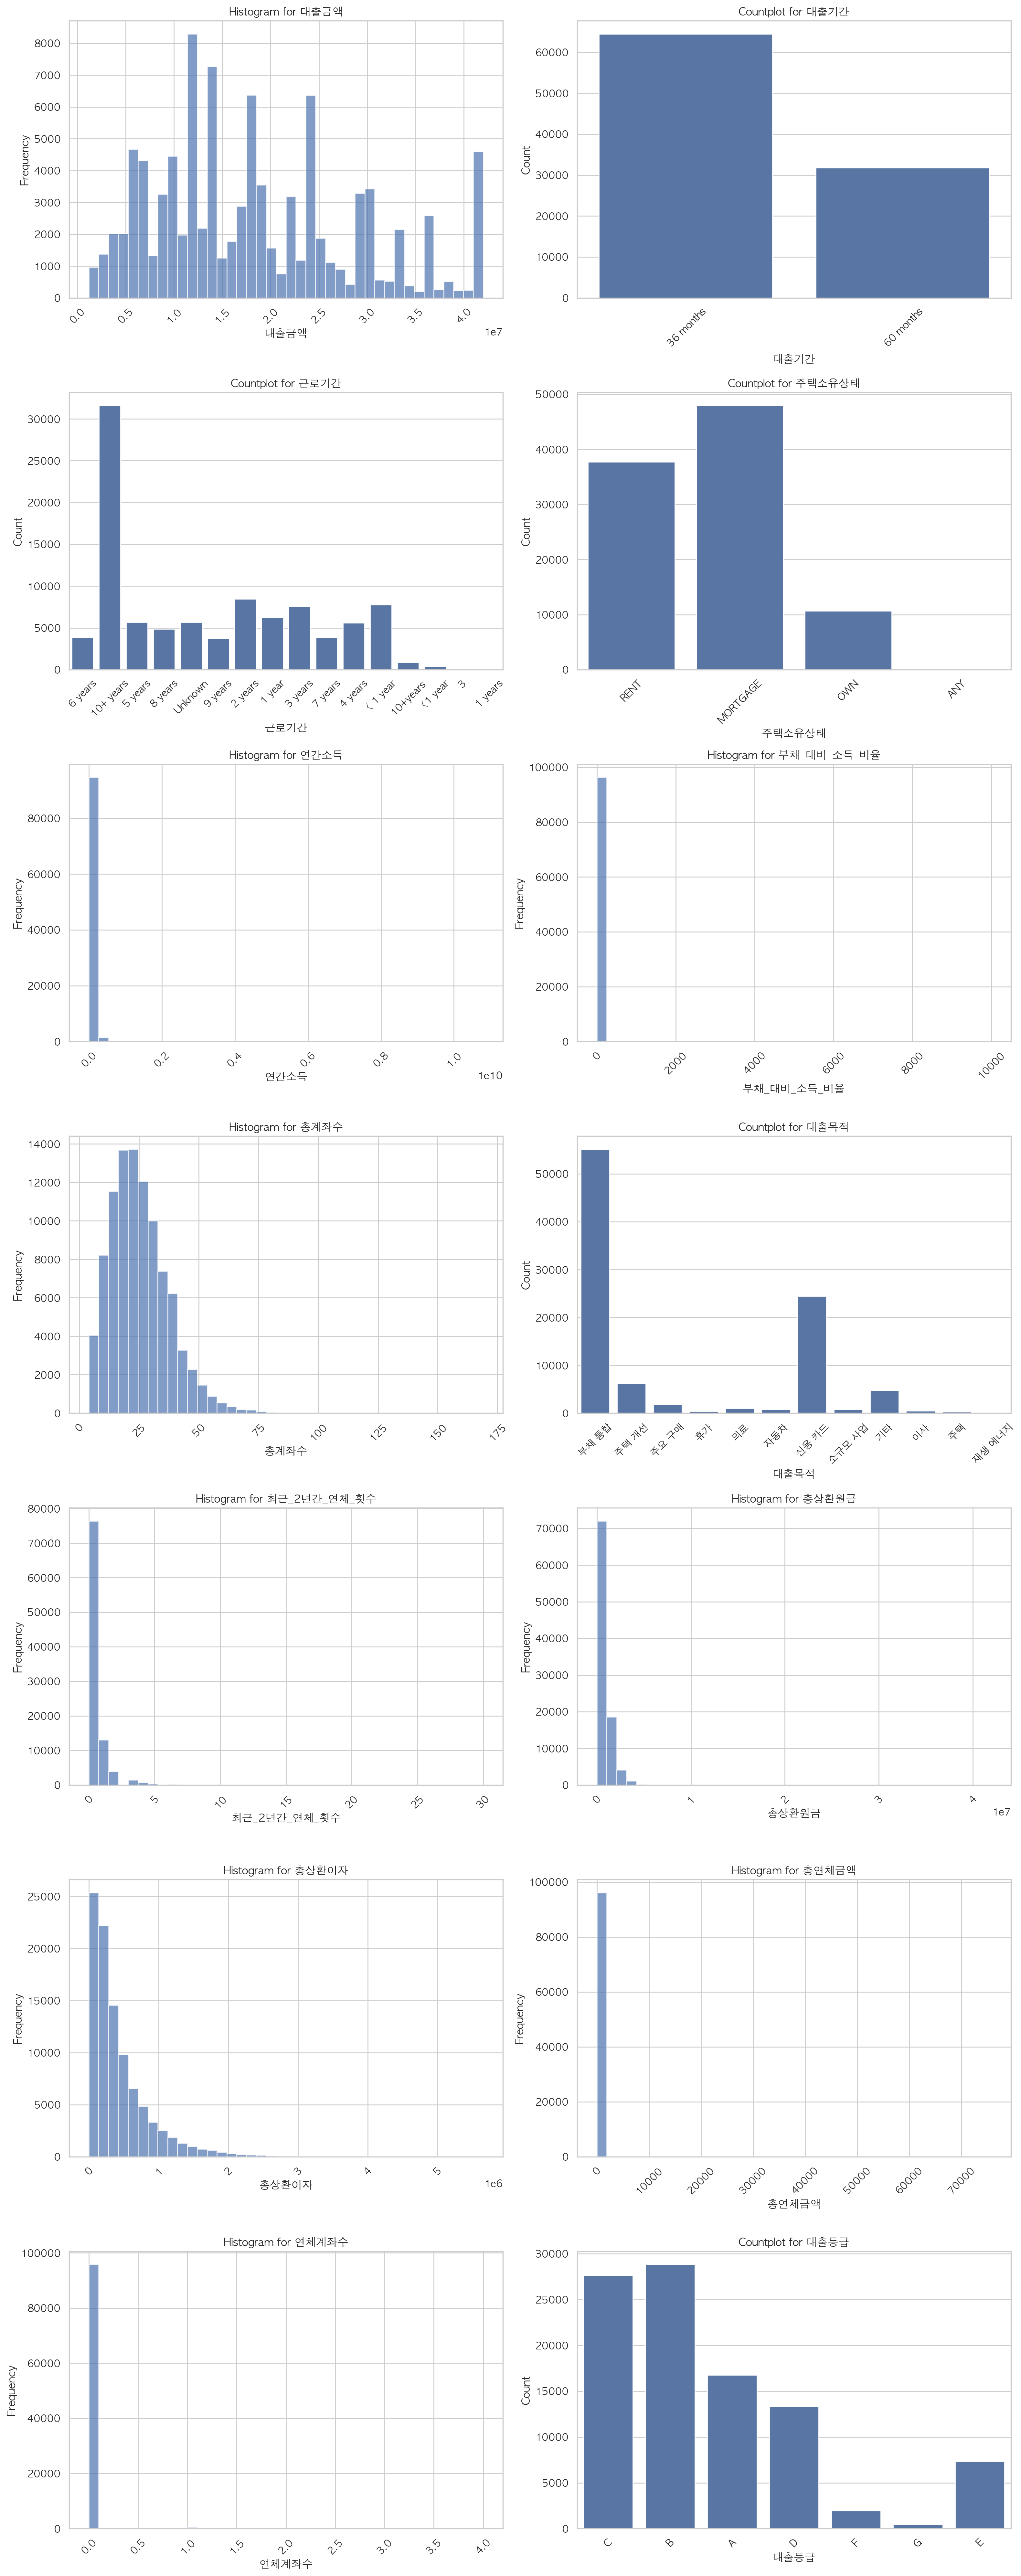

In [16]:
# 컬럼별로 분포 확인

num_cols = len(columns_to_plot)
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(16, 40))

for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # 숫자형 데이터인 경우 히스토그램 그리기
    if np.issubdtype(df[column].dtype, np.number):
        ax.hist(df[column], bins=40, alpha=0.7)
        ax.set_title(f'Histogram for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.tick_params(axis='x', rotation=45)
        
    # 범주형 데이터인 경우 countplot 그리기
    else:
        sns.countplot(x=column, data=df, ax=ax)
        ax.set_title(f'Countplot for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
        
# 레이아웃 조정
plt.tight_layout()
plt.show()

In [17]:
# titanic에서처럼 feature를 합쳐보는 것도 생각해보자. 연관이 있는 컬럼이 어떤 것인지 다시 살펴볼 것

In [18]:
# 우선 boxplot 한 번 그려보자

In [19]:
df.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '대출목적', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급'],
      dtype='object')

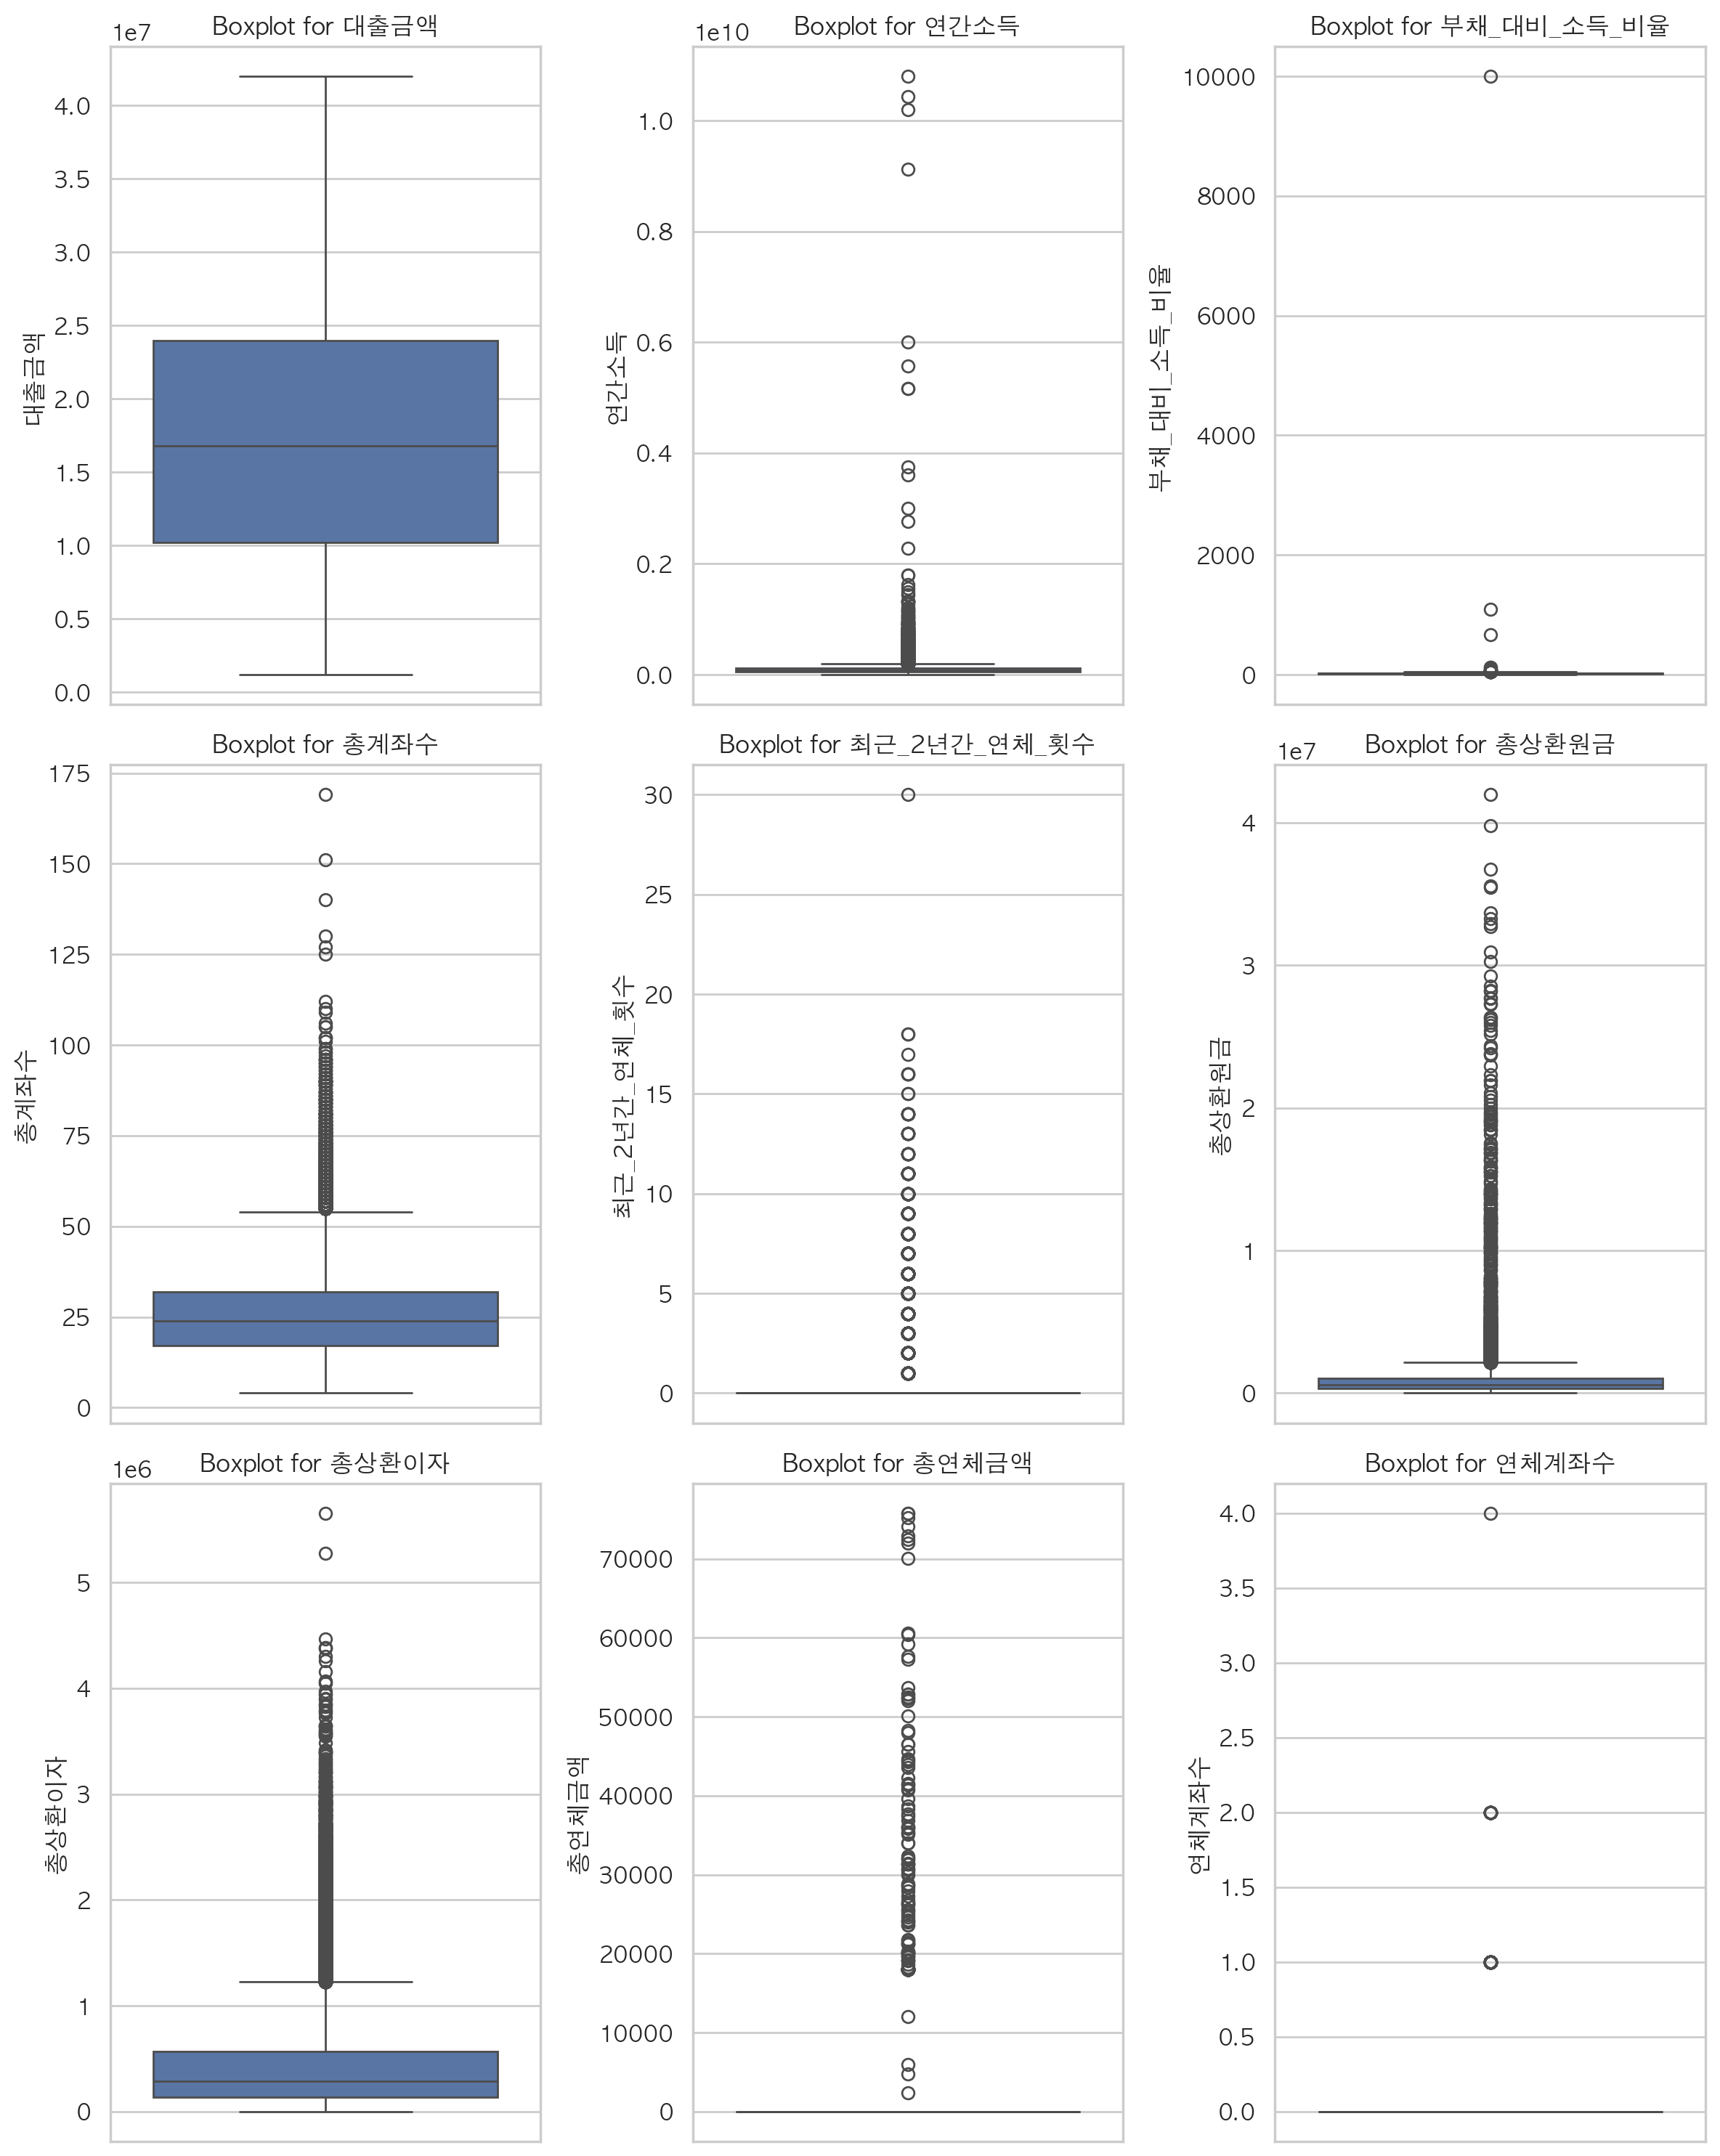

In [20]:
# 그래프를 그릴 열 선택
columns_to_plot = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

# 그래프를 그릴 행렬 크기 지정
num_rows, num_cols = 3, 3

# 그래프 생성
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 15))

# for 문을 사용하여 각 열에 대한 boxplot 그리기
for i, column in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')
    axes[row, col].set_ylabel(column)

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [21]:
# 이상치가 많음 그런데 이건 이상치를 제거하는게 답이 아닌 것 같음, 
# 하나하나가 고객 데이터이다 보니 몇 개만 제거하거나 모델링을 해 본 뒤 어떤게 제일 좋은지 확인 후 선택하는 것이 좋을 듯

In [22]:
# 지금 데이터 셋에는 결측치 없음, unknown과 같은 값이 있는데 컬럼별로 차례대로 정리

In [23]:
# 우선 대출기간 컬럼 범주형 -> 수치형으로 변경

df['대출기간'].value_counts()

 36 months    64479
 60 months    31815
Name: 대출기간, dtype: int64

In [24]:
def conv_loan_period(x):
    if x == ' 36 months':
        return 36
    else:
        return 60

In [25]:
df['대출기간'] = df['대출기간'].apply(conv_loan_period)

In [26]:
df.head(3)

ID      대출금액  대출기간       근로기간    주택소유상태       연간소득  부채_대비_소득_비율  \
0  TRAIN_00000  12480000    36    6 years      RENT   72000000        18.90   
1  TRAIN_00001  14400000    60  10+ years  MORTGAGE  130800000        22.33   
2  TRAIN_00002  12000000    36    5 years  MORTGAGE   96000000         8.60   

   총계좌수   대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0    15  부채 통합             0       0       0.0    0.0    0.0    C  
1    21  주택 개선             0  373572  234060.0    0.0    0.0    B  
2    14  부채 통합             0  928644  151944.0    0.0    0.0    A

In [27]:
# 근로기간 컬럼 범주형 -> 수치형으로 변경

df['근로기간'].value_counts().sort_values(ascending=False)

10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: 근로기간, dtype: int64

In [28]:
df[df['근로기간'] == 'Unknown']['연간소득'].mean()

60371758.02151296

In [29]:
df[df['근로기간'] == 'Unknown']['연간소득'].median()

54000000.0

In [30]:
# median 값이 연간 소득이 54,000,000원인 근로기간 그룹의 소득으로 값을 대체하는 것은 어떤지?

In [31]:
# 그러면 각 그룹별로 median 값을 구해야 하는데 같은 의미이지만 표현방식이 다른 그룹은 하나로 합춰야 할 것 같다.
# ex) 3 years, 3

In [32]:
df['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year',
       '10+years', '<1 year', '3', '1 years'], dtype=object)

In [33]:
df[(df['근로기간'] == '<1 year') | (df['근로기간'] == '< 1 year')]['연간소득'].median()

72000000.0

In [34]:
df[(df['근로기간'] == '1 year') | (df['근로기간'] == '1 years')]['연간소득'].median()

72000000.0

In [35]:
# 근로기간이 1년, 1년 미만인 그룹의 연간소득 중앙값이 같아서 그냥 같은 그룹에 넣었고 
# 'Unknown'인 그룹의 median 값이 근로기간 1년인 사람들의 median 값보다 낮아서 0.5로 변환해봄

In [36]:
def unit_standardization(x):
    if (x == '10+ years') or (x == '10+years'):
        return 10
    elif x == '9 years':
        return 9
    elif x == '8 years':
        return 8
    elif x == '7 years':
        return 7
    elif x == '6 years':
        return 6
    elif x == '5 years':
        return 5
    elif x == '4 years':
        return 4
    elif (x == '3 years') or (x == '3'):
        return 3
    elif x == '2 years':
        return 2
    elif (x == '1 year') or (x == '1 years') or (x == '< 1 year') or (x == '<1 year') :
        return 1
    else:
        return 0.5

In [37]:
df['근로기간'].apply(unit_standardization).value_counts().sort_values(ascending=False)

10.0    32481
1.0     14449
2.0      8450
3.0      7670
0.5      5671
5.0      5665
4.0      5588
8.0      4888
6.0      3874
7.0      3814
9.0      3744
Name: 근로기간, dtype: int64

In [38]:
# 위의 결과를 보고 근로기간에 따른 대출 목적을 살펴보면 좋을 것 같다.

In [39]:
df['근로기간'] = df['근로기간'].apply(unit_standardization)

In [40]:
df.head(3)

ID      대출금액  대출기간  근로기간    주택소유상태       연간소득  부채_대비_소득_비율  총계좌수  \
0  TRAIN_00000  12480000    36   6.0      RENT   72000000        18.90    15   
1  TRAIN_00001  14400000    60  10.0  MORTGAGE  130800000        22.33    21   
2  TRAIN_00002  12000000    36   5.0  MORTGAGE   96000000         8.60    14   

    대출목적  최근_2년간_연체_횟수   총상환원금     총상환이자  총연체금액  연체계좌수 대출등급  
0  부채 통합             0       0       0.0    0.0    0.0    C  
1  주택 개선             0  373572  234060.0    0.0    0.0    B  
2  부채 통합             0  928644  151944.0    0.0    0.0    A

In [41]:
# 그럼 이쯤에서 상관계수 확인

In [42]:
df_corr = df.corr()
df_corr

대출금액      대출기간      근로기간      연간소득  부채_대비_소득_비율      총계좌수  \
대출금액          1.000000  0.402573  0.114196  0.273975     0.002263  0.212309   
대출기간          0.402573  1.000000  0.072170  0.038396     0.030263  0.105956   
근로기간          0.114196  0.072170  1.000000  0.080253     0.001789  0.095457   
연간소득          0.273975  0.038396  0.080253  1.000000    -0.044594  0.145403   
부채_대비_소득_비율   0.002263  0.030263  0.001789 -0.044594     1.000000  0.058830   
총계좌수          0.212309  0.105956  0.095457  0.145403     0.058830  1.000000   
최근_2년간_연체_횟수 -0.014775 -0.013857  0.022449  0.040260     0.000699  0.112092   
총상환원금         0.379061 -0.090007  0.035940  0.137552    -0.016180  0.083615   
총상환이자         0.615680  0.412330  0.067824  0.114311     0.018565  0.116299   
총연체금액         0.011853  0.005247  0.000813  0.000333     0.000711  0.000037   
연체계좌수         0.000182  0.006988  0.003806  0.009854     0.000051  0.023652   

              최근_2년간_연체_횟수     총상환원금     총상환이자     총연체금액     연체계좌수  
대출금액             -0.014775  0.379061  0.615680  0.011853  0.000182  
대출기간             -0.013857 -0.090007  0.412330  0.005247  0.006988  
근로기간              0.022449  0.035940  0.067824  0.000813  0.003806  
연간소득              0.040260  0.137552  0.114311  0.000333  0.009854  
부채_대비_소득_비율       0.000699 -0.016180  0.018565  0.000711  0.000051  
총계좌수              0.112092  0.083615  0.116299  0.000037  0.023652  
최근_2년간_연체_횟수      1.000000 -0.010048  0.008095  0.004612  0.133632  
총상환원금            -0.010048  1.000000  0.412385  0.015379 -0.005190  
총상환이자             0.008095  0.412385  1.000000  0.057838  0.009257  
총연체금액             0.004612  0.015379  0.057838  1.000000  0.006620  
연체계좌수             0.133632 -0.005190  0.009257  0.006620  1.000000

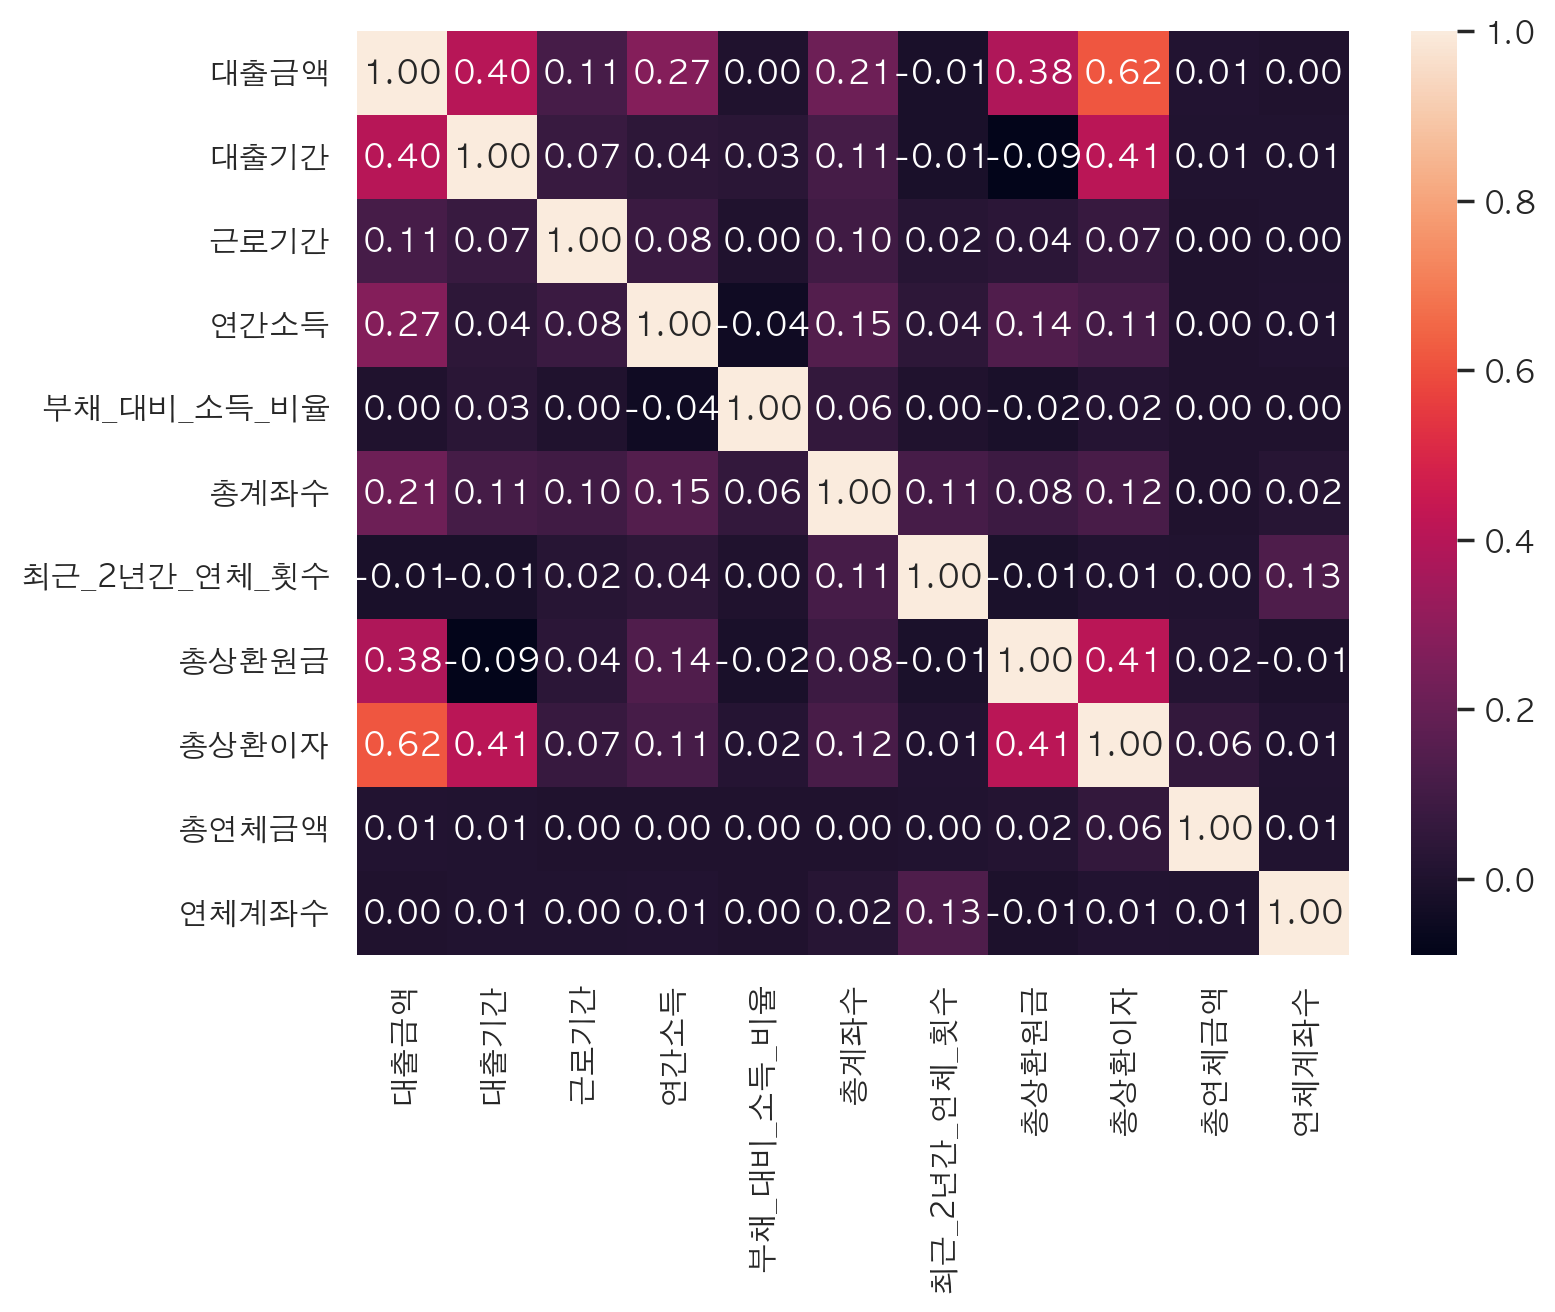

In [43]:
# 히트맵 그래프

plt.figure(figsize=(8, 6))
sns.heatmap(data=df_corr, annot=True, fmt=".2f")
plt.show()

In [44]:
# 범주형 데이터 onehotencoding

df_encoded = pd.get_dummies(df, columns=['주택소유상태', '대출목적'], prefix='en')
df_encoded.head()

ID      대출금액  대출기간  근로기간       연간소득  부채_대비_소득_비율  총계좌수  \
0  TRAIN_00000  12480000    36   6.0   72000000        18.90    15   
1  TRAIN_00001  14400000    60  10.0  130800000        22.33    21   
2  TRAIN_00002  12000000    36   5.0   96000000         8.60    14   
3  TRAIN_00003  14400000    36   8.0  132000000        15.09    15   
4  TRAIN_00004  18000000    60   0.5   71736000        25.39    19   

   최근_2년간_연체_횟수   총상환원금     총상환이자  ...  en_소규모 사업  en_신용 카드 en_의료  en_이사  \
0             0       0       0.0  ...          0         0     0      0   
1             0  373572  234060.0  ...          0         0     0      0   
2             0  928644  151944.0  ...          0         0     0      0   
3             0  325824  153108.0  ...          0         0     0      0   
4             0  228540  148956.0  ...          0         0     0      0   

   en_자동차  en_재생 에너지  en_주요 구매  en_주택  en_주택 개선  en_휴가  
0       0          0         0      0         0      0  
1       0          0         0      0         1      0  
2       0          0         0      0         0      0  
3       0          0         0      0         0      0  
4       0          0         1      0         0      0  

[5 rows x 29 columns]

In [45]:
df_encoded.columns

Index(['ID', '대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '대출등급', 'en_ANY',
       'en_MORTGAGE', 'en_OWN', 'en_RENT', 'en_기타', 'en_부채 통합', 'en_소규모 사업',
       'en_신용 카드', 'en_의료', 'en_이사', 'en_자동차', 'en_재생 에너지', 'en_주요 구매',
       'en_주택', 'en_주택 개선', 'en_휴가'],
      dtype='object')

In [46]:
# 로그스케일링 적용해보기 

In [47]:
log_list = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

In [48]:
# 로그스케일 적용
for col in log_list:
    df_encoded[col] = np.log1p(df_encoded[col])
    df_encoded[col] = np.log1p(df_encoded[col])

In [49]:
def get_3_hist(data:pd.DataFrame, columns:list):
    """ 데이터와 컬럼을 전달하면 히스토그램을 3개씩 출력해주는 함수

    Args:
        data (pd.DataFrame): 데이터프레임
        columns (list): 컬럼 리스트
    """
    plt.figure(figsize=(15, 5 * (len(columns) // 3)))

    for i, col in enumerate(columns):
        # 서브플롯 위치 설정
        plt.subplot(len(columns) // 3 + (len(columns) % 3 > 0), 3, i + 1)
        # 히스토그램 그리기
        sns.histplot(data[col])
        plt.title(col)

    # 전체 그림 표시
    plt.tight_layout()
    plt.show()

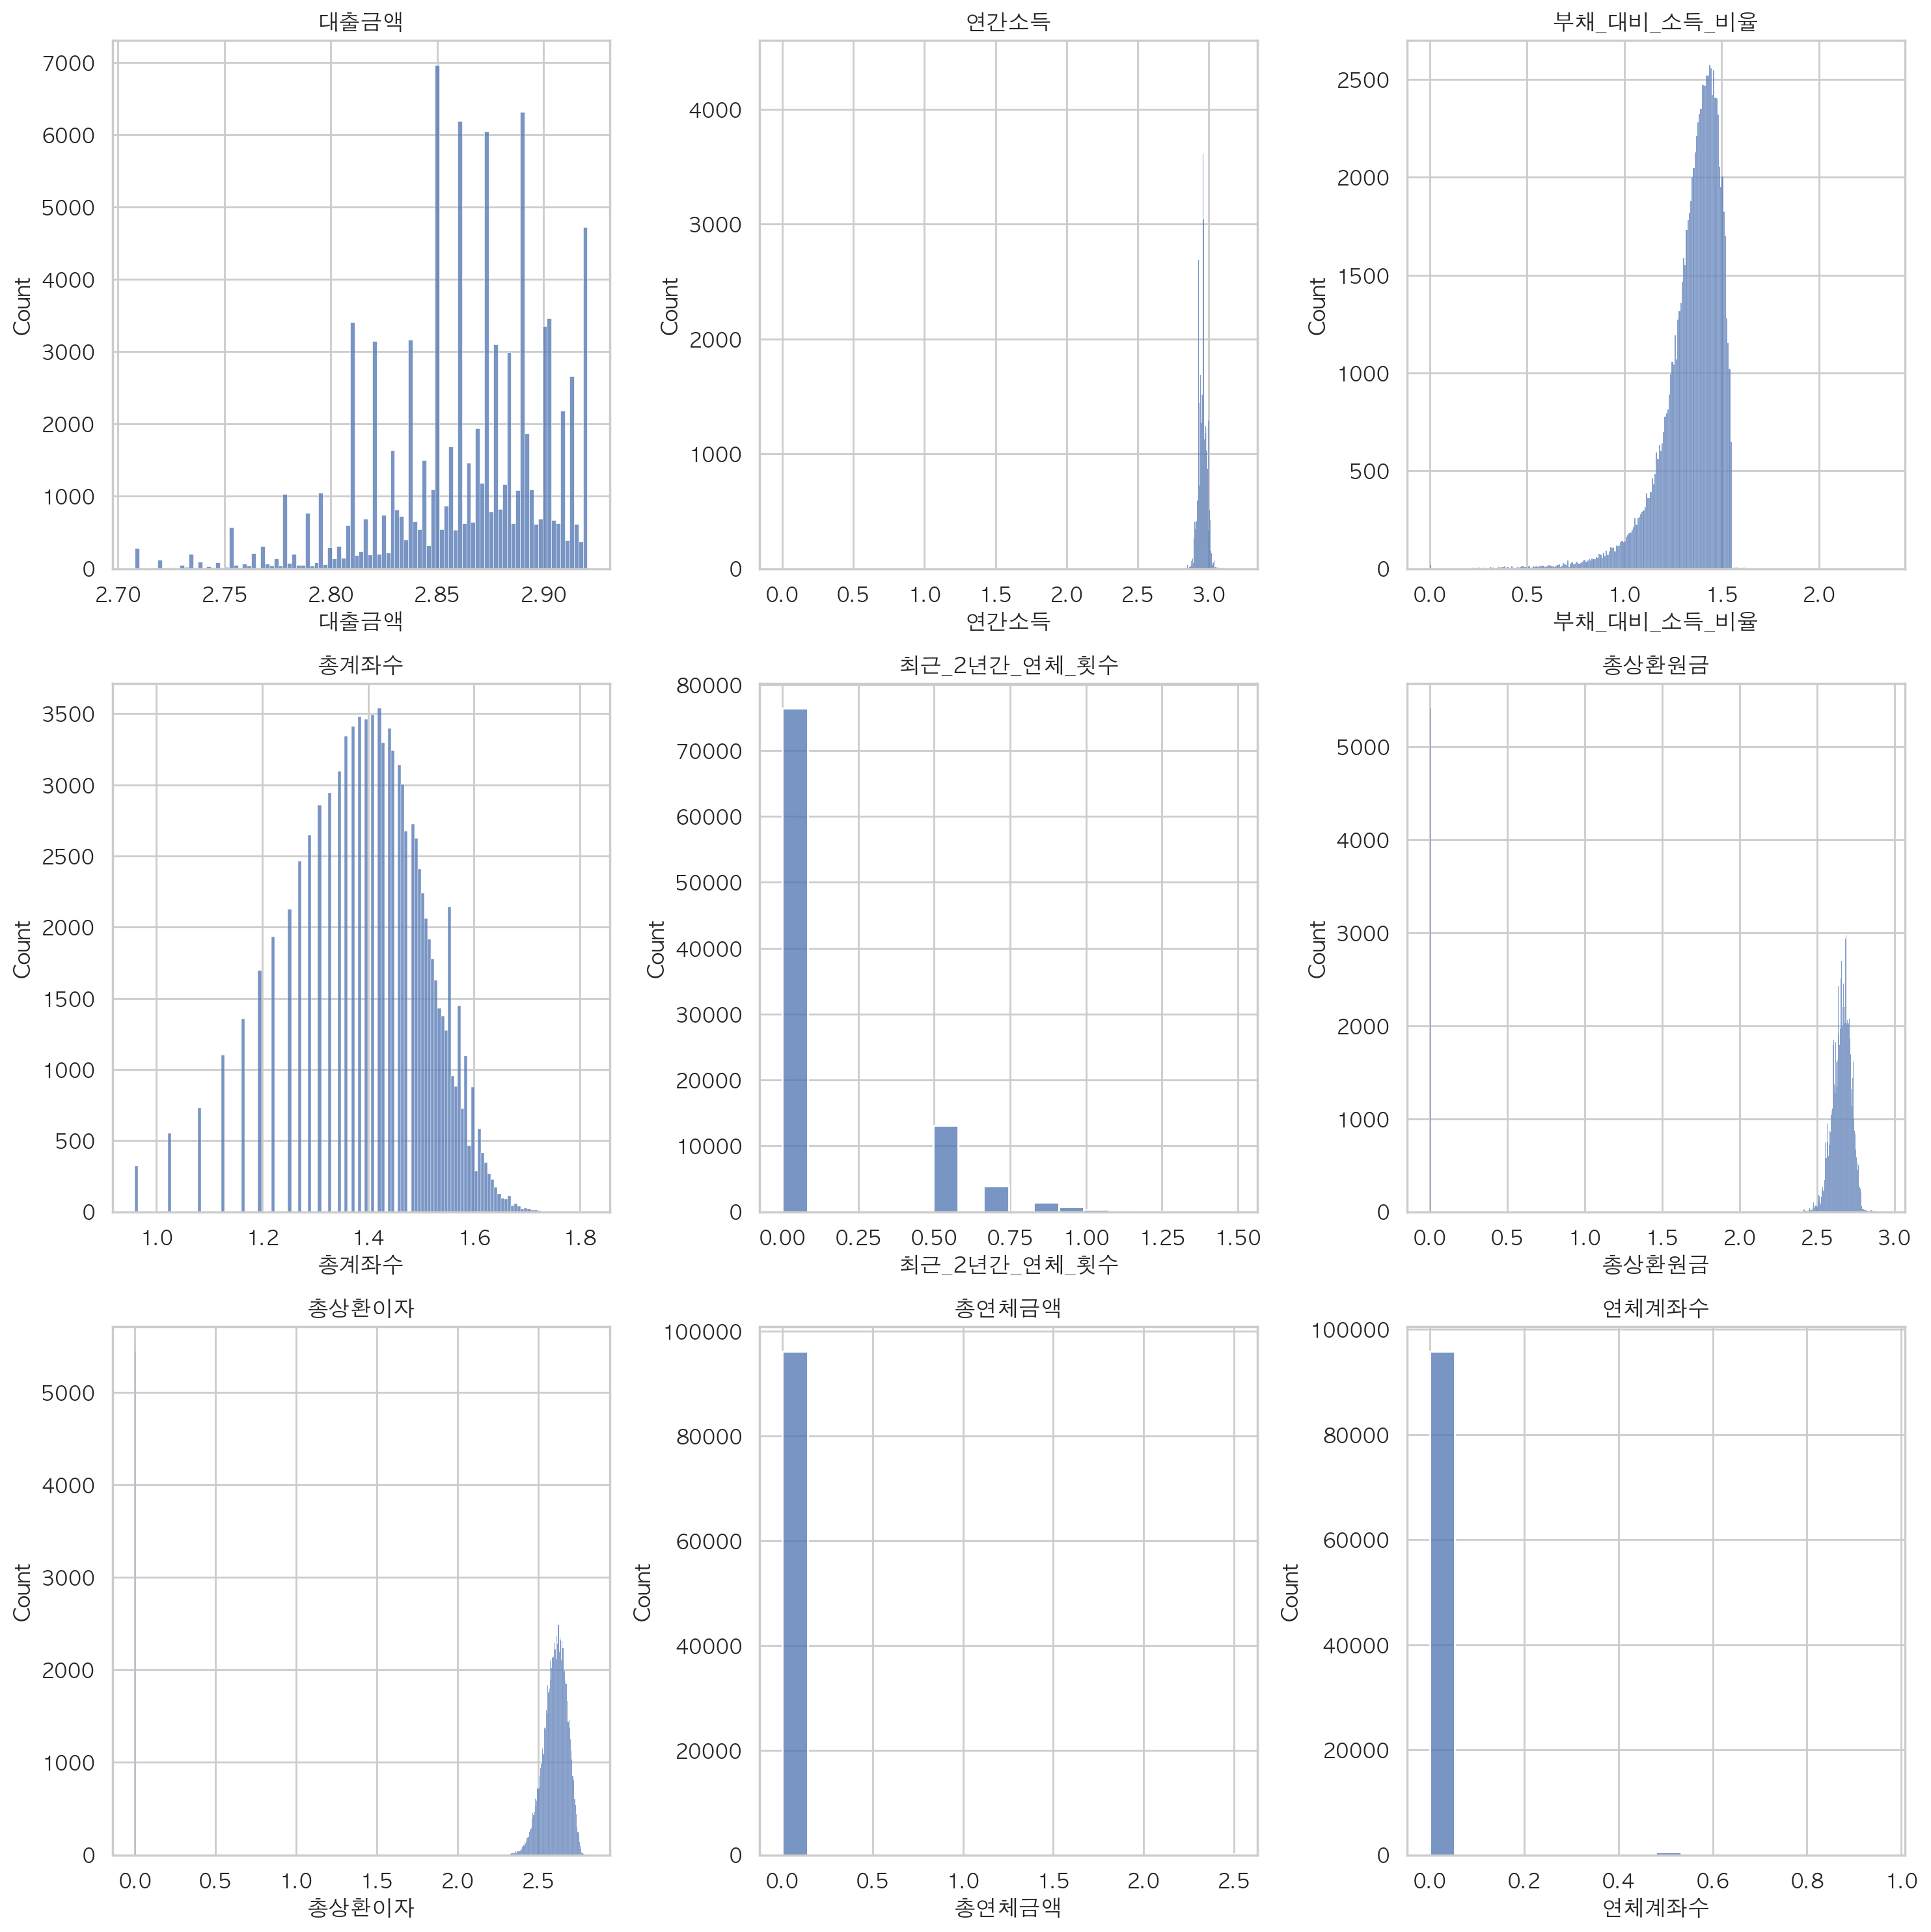

In [50]:
#로그스케일 변환 후 시각화
get_3_hist(df_encoded, log_list)

In [51]:
df_encoded.head(3)

ID      대출금액  대출기간  근로기간      연간소득  부채_대비_소득_비율      총계좌수  \
0  TRAIN_00000  2.852995    36   6.0  2.949279     1.383972  1.327761   
1  TRAIN_00001  2.861214    60  10.0  2.980069     1.423046  1.408800   
2  TRAIN_00002  2.850731    36   5.0  2.964234     1.182268  1.310506   

   최근_2년간_연체_횟수     총상환원금     총상환이자  ...  en_소규모 사업  en_신용 카드 en_의료  en_이사  \
0           0.0  0.000000  0.000000  ...          0         0     0      0   
1           0.0  2.626903  2.592515  ...          0         0     0      0   
2           0.0  2.690665  2.559649  ...          0         0     0      0   

   en_자동차  en_재생 에너지  en_주요 구매  en_주택  en_주택 개선  en_휴가  
0       0          0         0      0         0      0  
1       0          0         0      0         1      0  
2       0          0         0      0         0      0  

[3 rows x 29 columns]

In [52]:
# 수치형 데이터 standard 스케일링

from sklearn.preprocessing import StandardScaler

In [53]:
# 스케일링할 컬럼 선택
columns_to_scale = ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']

In [54]:
# StandardScaler 객체 생성
scaler = StandardScaler()

# 선택한 컬럼들에 대해 스케일링 적용
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

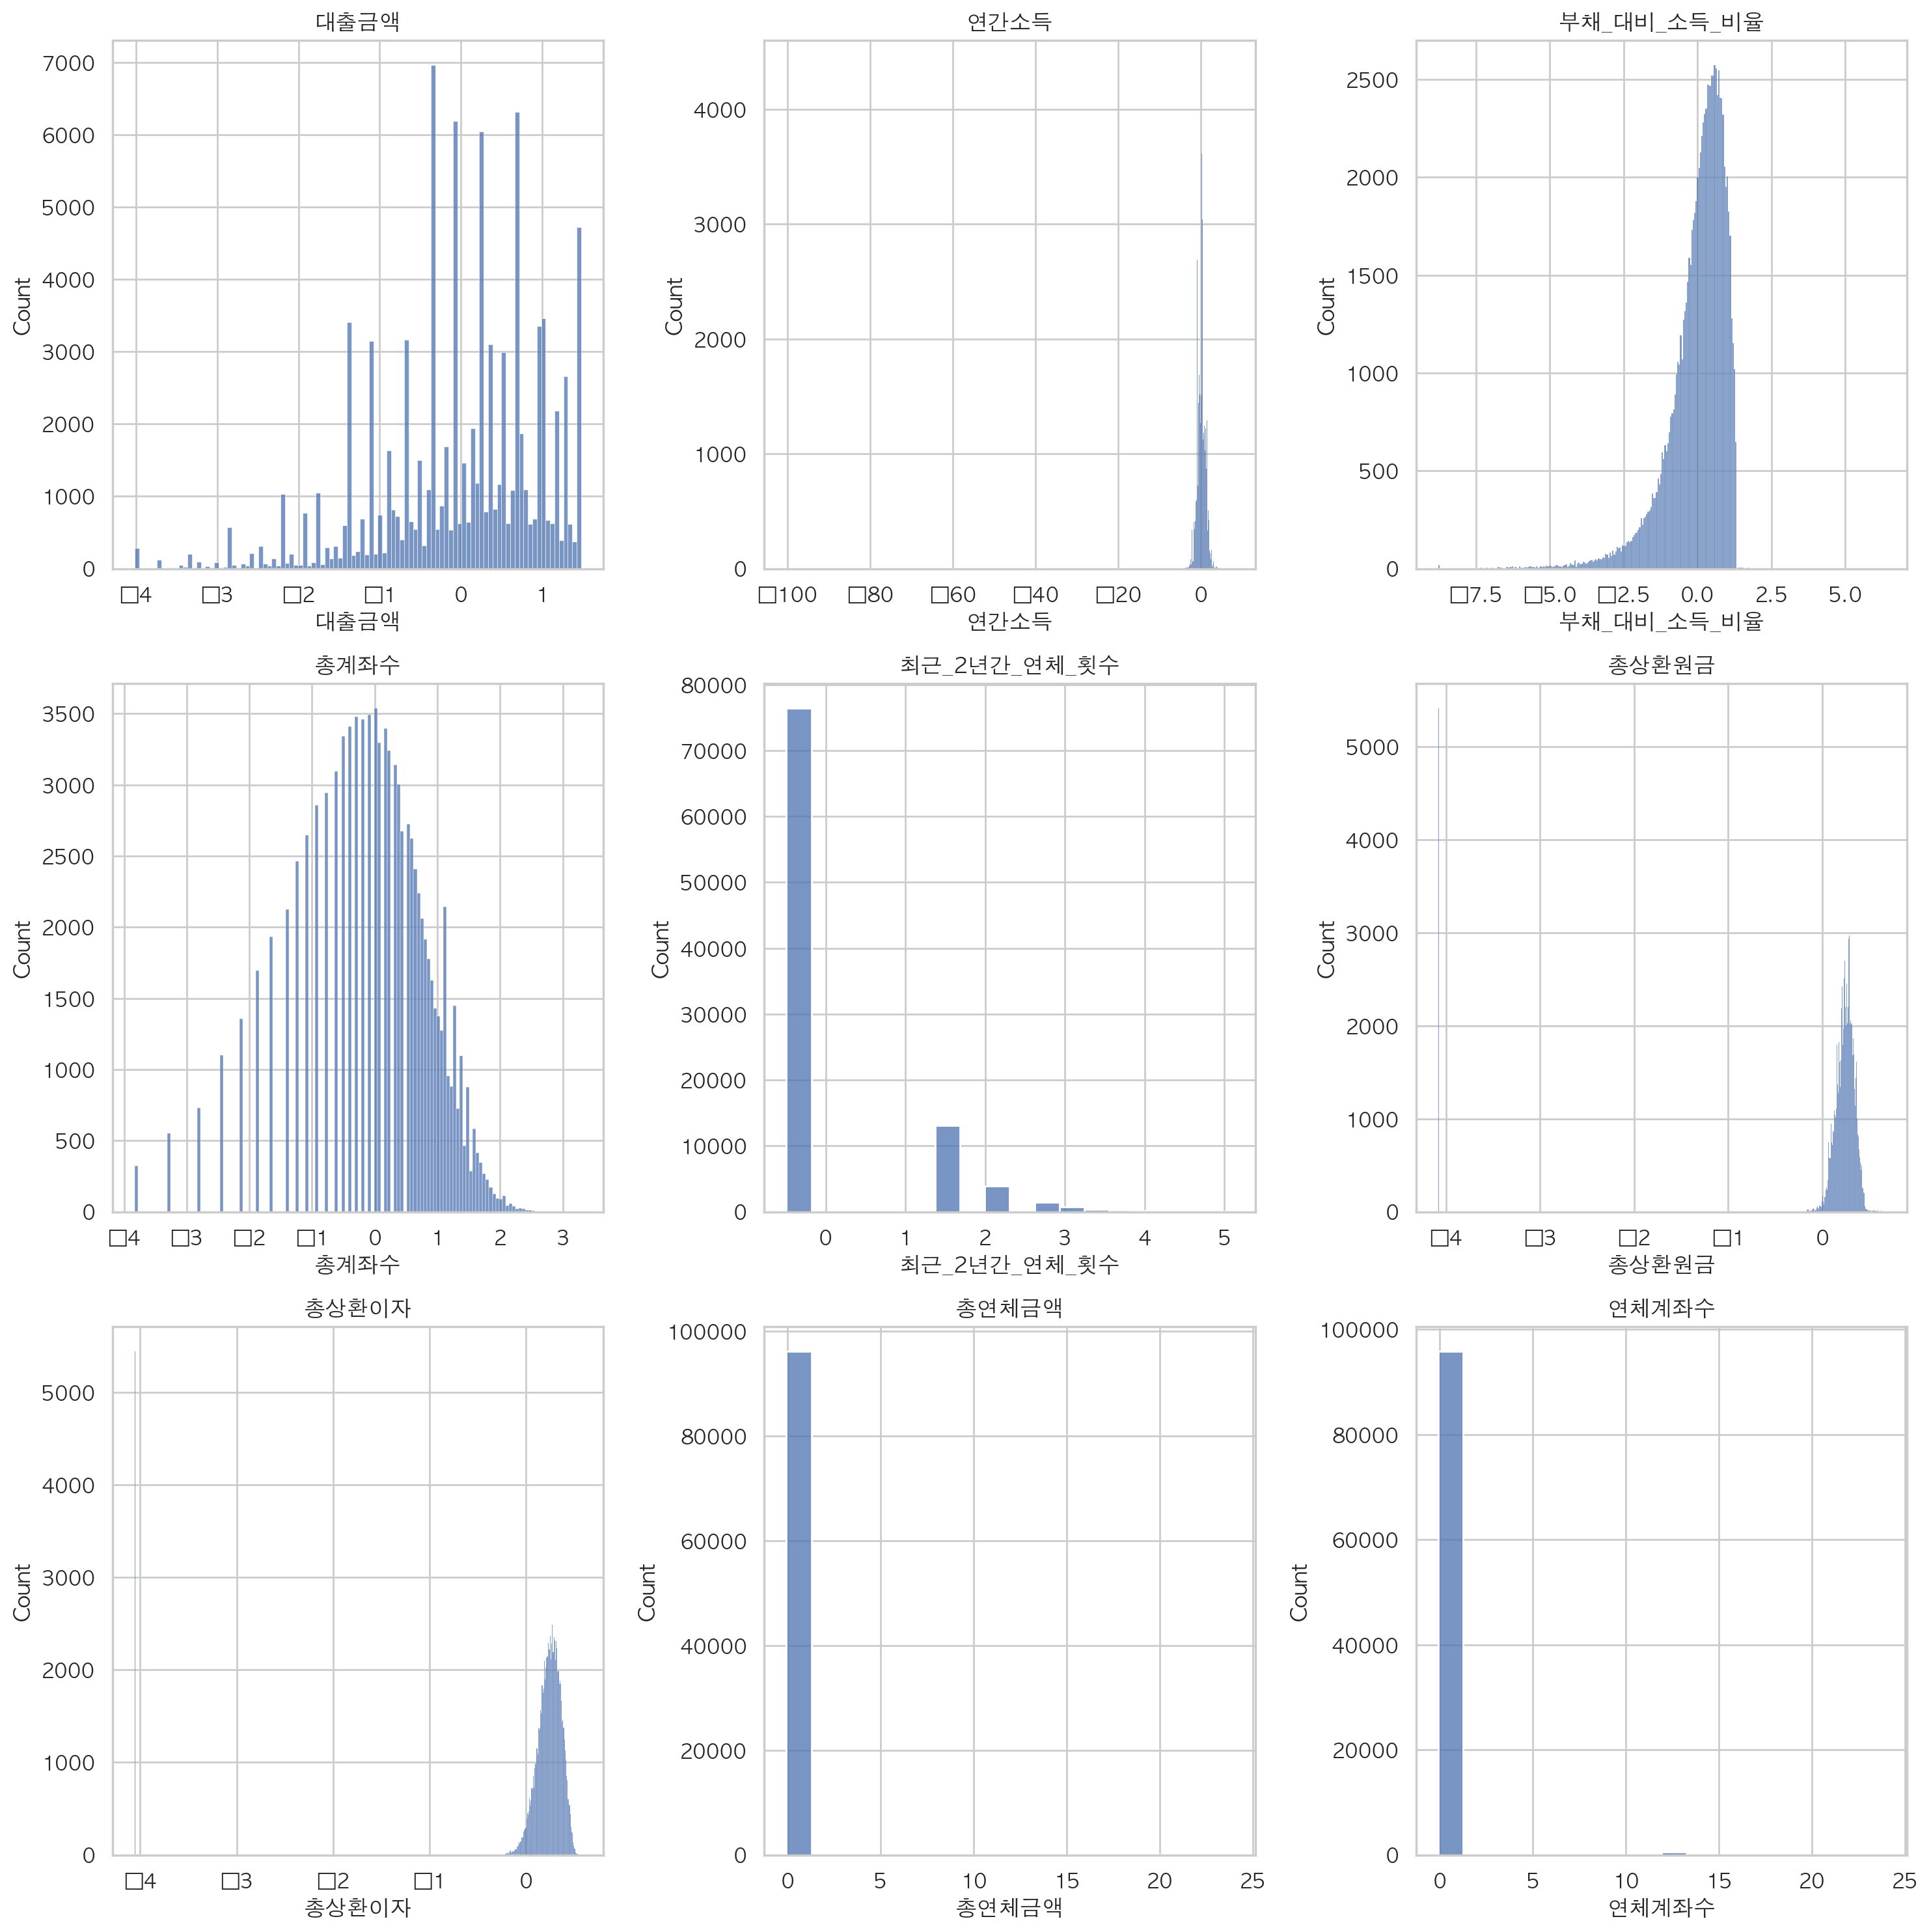

In [55]:
# 스텐다드 스케일 변환 후 시각화
get_3_hist(df_encoded, columns_to_scale)

In [56]:
df_encoded.head()

ID      대출금액  대출기간  근로기간      연간소득  부채_대비_소득_비율      총계좌수  \
0  TRAIN_00000 -0.268051    36   6.0 -0.174901     0.232156 -0.760126   
1  TRAIN_00001 -0.055558    60  10.0  0.869141     0.486315 -0.085072   
2  TRAIN_00002 -0.326597    36   5.0  0.332213    -1.079836 -0.903863   
3  TRAIN_00003 -0.055558    36   8.0  0.884865    -0.123802 -0.760126   
4  TRAIN_00004  0.272346    60   0.5 -0.181425     0.676684 -0.281436   

   최근_2년간_연체_횟수     총상환원금     총상환이자  ...  en_소규모 사업  en_신용 카드 en_의료  en_이사  \
0     -0.490388 -4.080075 -4.057770  ...          0         0     0      0   
1     -0.490388  0.187837  0.218018  ...          0         0     0      0   
2     -0.490388  0.291432  0.163813  ...          0         0     0      0   
3     -0.490388  0.171693  0.164786  ...          0         0     0      0   
4     -0.490388  0.129063  0.161278  ...          0         0     0      0   

   en_자동차  en_재생 에너지  en_주요 구매  en_주택  en_주택 개선  en_휴가  
0       0          0         0      0         0      0  
1       0          0         0      0         1      0  
2       0          0         0      0         0      0  
3       0          0         0      0         0      0  
4       0          0         1      0         0      0  

[5 rows x 29 columns]

In [57]:
# target 라벨인코딩하기

from sklearn.preprocessing import LabelEncoder

In [58]:
# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

In [59]:
label_encoder.fit_transform(df_encoded['대출등급'])

array([2, 1, 0, ..., 0, 3, 2])

In [60]:
df_encoded['대출등급'] = label_encoder.fit_transform(df_encoded['대출등급'])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_list = ['대출금액', '대출기간', '근로기간', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', 'en_ANY',
       'en_MORTGAGE', 'en_OWN', 'en_RENT', 'en_기타', 'en_부채 통합', 'en_소규모 사업',
       'en_신용 카드', 'en_의료', 'en_이사', 'en_자동차', 'en_재생 에너지', 'en_주요 구매',
       'en_주택', 'en_주택 개선', 'en_휴가']

In [63]:
X = df_encoded[x_list] 
y = df_encoded['대출등급']

# Train set과 Test set으로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [64]:
# 머신러닝모델 불러오기

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# LightGBM
#import lightgbm as lgb
# CatBoost
#from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, f1_score

In [65]:
# LogisticRegression 모델 

model_lor = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_lor.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [66]:
y_pred_train = model_lor.predict(X_train)
y_pred_test = model_lor.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.374512  0.332222
test   0.373152  0.330380

In [67]:
# DecisionTreeClassifier 모델

model_dt = DecisionTreeClassifier(random_state=42, max_depth=3)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [68]:
y_pred_train = model_dt.predict(X_train)
y_pred_test = model_dt.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result)

accuracy        F1
train  0.384512  0.346620
test   0.380525  0.342262

In [93]:
# RandomForestClassifier 모델

# Define the parameter grid
param_grid = {
    'max_depth': [10, 20, 30],
    'n_estimators': [200]
}

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Max Depth', 'N Estimators', 'Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score'])

# Iterate over parameter values
for max_depth in param_grid['max_depth']:
    for n_estimators in param_grid['n_estimators']:
        # Create and train the model
        model_rf = RandomForestClassifier(random_state=42, max_depth=max_depth, n_estimators=n_estimators)
        model_rf.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = model_rf.predict(X_train)
        y_pred_test = model_rf.predict(X_test)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
        test_f1_score = f1_score(y_test, y_pred_test, average='weighted')
        
        # Store results in the DataFrame
        results_df = results_df.append({
            'Max Depth': max_depth,
            'N Estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Train F1-Score': train_f1_score,
            'Test F1-Score': test_f1_score
        }, ignore_index=True)

# Print the results
results_df

Max Depth  N Estimators  Train Accuracy  Test Accuracy  Train F1-Score  \
0       10.0         200.0        0.642979       0.590813        0.626277   
1       20.0         200.0        0.989674       0.742359        0.989688   
2       30.0         200.0        1.000000       0.760428        1.000000   

   Test F1-Score  
0       0.566648  
1       0.735099  
2       0.754389

In [94]:
# Define the parameter grid
param_grid = {
    'max_depth': [40, 50],
    'n_estimators': [200, 300, 400]
}

# Create an empty DataFrame to store results
results_df2 = pd.DataFrame(columns=['Max Depth', 'N Estimators', 'Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score'])

# Iterate over parameter values
for max_depth in param_grid['max_depth']:
    for n_estimators in param_grid['n_estimators']:
        # Create and train the model
        model_rf = RandomForestClassifier(random_state=42, max_depth=max_depth, n_estimators=n_estimators)
        model_rf.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = model_rf.predict(X_train)
        y_pred_test = model_rf.predict(X_test)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
        test_f1_score = f1_score(y_test, y_pred_test, average='weighted')
        
        # Store results in the DataFrame
        results_df2 = results_df2.append({
            'Max Depth': max_depth,
            'N Estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Train F1-Score': train_f1_score,
            'Test F1-Score': test_f1_score
        }, ignore_index=True)

# Print the results
results_df2

Max Depth  N Estimators  Train Accuracy  Test Accuracy  Train F1-Score  \
0       40.0         200.0             1.0       0.758282             1.0   
1       40.0         300.0             1.0       0.760012             1.0   
2       40.0         400.0             1.0       0.760255             1.0   
3       50.0         200.0             1.0       0.757139             1.0   
4       50.0         300.0             1.0       0.758939             1.0   
5       50.0         400.0             1.0       0.759424             1.0   

   Test F1-Score  
0       0.752132  
1       0.753959  
2       0.754180  
3       0.751033  
4       0.752721  
5       0.753153

In [96]:
# Define the parameter grid
param_grid = {
    'max_depth': [30],
    'n_estimators': [300, 400, 500, 600, 700]
}

# Create an empty DataFrame to store results
results_df3 = pd.DataFrame(columns=['Max Depth', 'N Estimators', 'Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score'])

# Iterate over parameter values
for max_depth in param_grid['max_depth']:
    for n_estimators in param_grid['n_estimators']:
        # Create and train the model
        model_rf = RandomForestClassifier(random_state=42, max_depth=max_depth, n_estimators=n_estimators)
        model_rf.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = model_rf.predict(X_train)
        y_pred_test = model_rf.predict(X_test)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
        test_f1_score = f1_score(y_test, y_pred_test, average='weighted')
        
        # Store results in the DataFrame
        results_df3 = results_df3.append({
            'Max Depth': max_depth,
            'N Estimators': n_estimators,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Train F1-Score': train_f1_score,
            'Test F1-Score': test_f1_score
        }, ignore_index=True)

# Print the results
results_df3

Max Depth  N Estimators  Train Accuracy  Test Accuracy  Train F1-Score  \
0       30.0         300.0             1.0       0.760047             1.0   
1       30.0         400.0             1.0       0.760566             1.0   
2       30.0         500.0             1.0       0.760739             1.0   
3       30.0         600.0             1.0       0.760012             1.0   
4       30.0         700.0             1.0       0.760705             1.0   

   Test F1-Score  
0       0.753996  
1       0.754506  
2       0.754692  
3       0.753917  
4       0.754573

In [97]:
model_rf = RandomForestClassifier(random_state=42, max_depth=30, n_estimators=100)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, random_state=42)

In [98]:
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_100 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_100)

accuracy        F1
train  1.000000  1.000000
test   0.754439  0.748156

In [99]:
# 여러 결과를 봤을 때 RandomForestClassifier는 max_depth=30, n_estimators=200 정도가 효율적인 것 같다.

In [101]:
# KNeighborsClassifier 모델

model_knc = KNeighborsClassifier(n_neighbors=3, weights='uniform')
model_knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [103]:
y_pred_train = model_knc.predict(X_train)
y_pred_test = model_knc.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_knc = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_knc)

accuracy        F1
train  0.593680  0.578149
test   0.315795  0.297320

In [104]:
# 너무 낮은데 ????????????????????
# 나중에 하이퍼파리미터 변경해서 다시 해보자

In [ ]:
# SVC모델 <--너도 하이퍼파라미터 공부하고 오자 생각해보아야 하는게 너무 많다.
model_svc = SVC()
model_svc.fit(X_train, y_train)

In [107]:
# XGBClassifier 모델 <-- 얘도 하이퍼파리미터 여러개 변경해 보아야 함

model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, random_state = 42)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [108]:
y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb)

accuracy        F1
train  0.788769  0.785957
test   0.771159  0.766918

In [109]:
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=4, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb1 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb1)

accuracy        F1
train  0.845590  0.844707
test   0.822424  0.820447

In [111]:
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=5, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb2 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb2)

accuracy        F1
train  0.881626  0.881368
test   0.848212  0.847083

In [112]:
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=6, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb2 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb2)

accuracy        F1
train  0.905170  0.905136
test   0.857281  0.856377

In [113]:
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=7, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb2 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb2)

accuracy        F1
train  0.928255  0.928282
test   0.863270  0.862523

In [114]:
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=8, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb2 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb2)

accuracy        F1
train  0.946710  0.946735
test   0.867181  0.866451

In [115]:
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=9, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb2 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb2)

accuracy        F1
train  0.965997  0.966020
test   0.871231  0.870529

In [116]:
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=10, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb2 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb2)

accuracy        F1
train  0.978325  0.978341
test   0.873724  0.873070

In [117]:
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=11, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb2 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb2)

accuracy        F1
train  0.988725  0.988731
test   0.874347  0.873674

In [118]:
model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=12, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb2 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb2)

accuracy        F1
train  0.994318  0.994320
test   0.877220  0.876525

In [119]:
model_xgb = XGBClassifier(n_estimators=200, learning_rate=0.2, max_depth=12, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb2 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb2)

accuracy        F1
train  0.999941  0.999941
test   0.880231  0.879581

In [121]:
model_xgb = XGBClassifier(n_estimators=300, learning_rate=0.2, max_depth=12, random_state = 42)
model_xgb.fit(X_train, y_train)

y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)
    
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
    
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

result_xgb2 = pd.DataFrame({'accuracy' : [train_accuracy, test_accuracy],
                            'F1' : [train_f1_score, test_f1_score]},
                            index = ['train','test'])

display(result_xgb2)

accuracy       F1
train  1.000000  1.00000
test   0.880612  0.87997

In [ ]:
# 모델 리스트
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=3),
    'Random Forest': RandomForestClassifier(random_state=42, max_depth=3, n_estimators=100),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'MLP': MLPClassifier(),
    'XGBoost': XGBClassifier()
}

# 결과 저장용 데이터프레임
results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score'])

# 각 모델에 대해 학습하고 결과 저장
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')
    
    results = results.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train F1-Score': train_f1_score,
        'Test F1-Score': test_f1_score
    }, ignore_index=True)

# 결과 출력
print(results)

In [ ]:
# 모델 리스트
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'MLP': MLPClassifier(),
    'XGBoost': XGBClassifier()
}

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# 결과 저장용 데이터프레임
results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score'])

# 각 모델에 대해 그리드 서치 수행
for model_name, model in models.items():
    # RandomForestClassifier에 대해서만 그리드 서치 진행
    if model_name == 'Random Forest':
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1_weighted')
        grid_search.fit(X_train, y_train)
        
        # 최적의 모델로 재설정
        model = grid_search.best_estimator_
    
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test, y_pred_test, average='weighted')
    
    results = results.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train F1-Score': train_f1_score,
        'Test F1-Score': test_f1_score
    }, ignore_index=True)

# 결과 출력
print(results)


In [ ]:
# 교차검증하는 라이브러리

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# 여러 max_depth 값에 대해 교차 검증 수행
for depth in range(3, 11):
    model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'max_depth={depth}: {scores.mean()}')

In [ ]:
# 하기 컬럼 다시보기

In [116]:
df[df['부채_대비_소득_비율'] == (df['부채_대비_소득_비율'].max())]

ID     대출금액  대출기간  근로기간    주택소유상태  연간소득  부채_대비_소득_비율  총계좌수  \
12498  TRAIN_12498  4440000    36   0.5  MORTGAGE     0       9999.0    20   

        대출목적  최근_2년간_연체_횟수   총상환원금    총상환이자  총연체금액  연체계좌수 대출등급  
12498  신용 카드             2  205356  85884.0    0.0    0.0    C

In [ ]:
# 테스트셋 안 건드리고 함수 써서 같이 전처리 되도록 함수 작성하기
# 로그 스케일링 해야 하는 컬럼 공부하고 제대로 알기
# 내일 회의 이후에 로그 스케일링 하는 것으로 
# 모델 2개 더 설치하기
# 모델별로 하이퍼 파라미터별 성능 좋은 것 찾기 , 그리드 서치? 사용하면 될 것 같음

# 1차적으로 팀원들끼리 정한대로 모델링 해보고 
# 내일 11시에 회의 후에 로그스케일링 -> 스탠다드 스케일링 하는 것으로 회의하기
# 튜터님한테 F1-score의 평균 계산 방법을 어떤거 선택해야 하는지 물어보기 옵션들은 macro, weighted, micro
# EDA진행하기
# Shap Value / Feature Importance 라이브러리 설치하기

In [ ]:
# 결과 저장용 데이터프레임
results = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'Train F1-Score', 'Test F1-Score'])

# 각 모델에 대해 학습하고 결과 저장
for model_name, model in models.items():
    model.fit(X_train, y_train_encoded)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train_encoded, y_pred_train)
    test_accuracy = accuracy_score(y_test_encoded, y_pred_test)
    
    train_f1_score = f1_score(y_train_encoded, y_pred_train, average='weighted')
    test_f1_score = f1_score(y_test_encoded, y_pred_test, average='weighted')
    
    results = results.append({
        'Model': model_name,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Train F1-Score': train_f1_score,
        'Test F1-Score': test_f1_score
    }, ignore_index=True)

# 결과 출력
print(results)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# 랜덤 포레스트 모델 정의
model_rf = RandomForestClassifier(random_state=42)

# 탐색할 매개변수 그리드 정의
param_grid = {
    'n_estimators': [200, 300, 400],  # 여러 값을 시도해보세요
    'max_depth': [None, 20, 30]  # 여러 값을 시도해보세요
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(model_rf, param_grid, cv=3, scoring='f1_weighted')

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 매개변수 출력
print("Best Parameters: ", grid_search.best_params_)

# 최적의 모델 가져오기
best_model = grid_search.best_estimator_
print(best_bmodel)

# 훈련 및 테스트 예측
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 결과 계산
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_f1_score = f1_score(y_train, y_pred_train, average='weighted')
test_f1_score = f1_score(y_test, y_pred_test, average='weighted')

# 결과 데이터프레임 생성 및 출력
result = pd.DataFrame({
    'accuracy': [train_accuracy, test_accuracy],
    'F1': [train_f1_score, test_f1_score]
}, index=['train', 'test'])

print(result)